
# 3. Machine Learning


## 3.3 Association Rule

In [ ]:
%%capture
%run "PKL - Main (Read Preprocess Visual).ipynb"
!pip install apyori
!pip install openpyxl
!pip install mlxtend

import openpyxl
import time
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules
#https://coderspacket.com/implementing-fp-growth-algorithm-in-machine-learning-using-python
#http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/fpgrowth/

Agar notebook dapat berjalan secara paralel, maka untuk asosiasi, klasifikasi, dan klastering dipisah menjadi notebook yang berbeda-beda. Untuk menjalankan preprocessing yang terdapat pada notebook utama maka menggunakan perintah %run. Kemudian karena membutuhkan library apyori dan openpyxl maka diintall terlebih dahulu. Untuk library lain yang sebelumnya juga digunakan pada notebook utama seperti pandas dan numpy tidak perlu diimport karena dengan menjalankan notebook utama sudah menambahkan depedensi tersebut ke notebook ini. Agar log output tidak muncul maka ditambahkan syntax %%capture di bagian paling awal baris kode program.

### 3.3.1 Apriori

In [ ]:
#Mengambil kolom yang merupakan fitur dari masing-masing kuesioner
df_dass_new_asc = df_dass_new.drop(df_dass_new.iloc[:,1:23].columns, axis=1)
df_erq_new_asc = df_erq_new.drop(df_erq_new.iloc[:,1:12].columns, axis=1)
df_aeq_new_asc = df_aeq_new.drop(df_aeq_new.iloc[:,1:66].columns, axis=1)
df_nilai_new_asc = df_nilai_new.drop("Mata Kuliah", axis=1)

#Melakukan rename terhadap label yang ada pada setiap kelas agar tidak ambigu ketika dimerge
df_dass_new_asc['Depression'] = df_dass_new_asc['Depression'].replace(['Normal','Mild','Moderate','Severe','Extremely Severe'],['Normal Depression','Mild Depression','Moderate Depression', 'Severe Depression','Extremely Severe Depression'])
df_dass_new_asc['Anxiety'] = df_dass_new_asc['Anxiety'].replace(['Normal','Mild','Moderate','Severe','Extremely Severe'],['Normal Anxiety','Mild Anxiety','Moderate Anxiety', 'Severe Anxiety','Extremely Severe Anxiety'])
df_dass_new_asc['Stress'] = df_dass_new_asc['Stress'].replace(['Normal','Mild','Moderate','Severe','Extremely Severe'],['Normal Stress','Mild Stress','Moderate Stress', 'Severe Stress','Extremely Severe Stress'])

df_aeq_new_asc['Class_Positive'] = df_aeq_new_asc['Class_Positive'].replace(['Low','Moderate','High'],['Low CP','Moderate CP','High CP'])
df_aeq_new_asc['Class_Negative'] = df_aeq_new_asc['Class_Negative'].replace(['Low','Moderate','High'],['Low CN','Moderate CN','High CN'])
df_aeq_new_asc['Learn_Positive'] = df_aeq_new_asc['Learn_Positive'].replace(['Low','Moderate','High'],['Low LP','Moderate LP','High LP'])
df_aeq_new_asc['Learn_Negative'] = df_aeq_new_asc['Learn_Negative'].replace(['Low','Moderate','High'],['Low LN','Moderate LN','High LN'])

df_erq_new_asc['CRF'] = df_erq_new_asc['CRF'].replace(['High','Moderate','Low'],['High CRF','Moderate CRF','Low CRF'])
df_erq_new_asc['ESF'] = df_erq_new_asc['ESF'].replace(['High','Moderate','Low'],['High ESF','Moderate ESF','Low ESF'])

##### Penjelasan:
Untuk mencari asosiasi baik itu algoritma apriori ataupun fp-growth, semua dataset digabung atau dimerger. Namun karena pada dataset sebelumnya label yang terdapat pada fitur hanya sebatas 'low','moderate','high' dan lain-lain yang mana sama untuk setiap fiturnya, maka setiap label tersebut ditambahkan nama kolom fiturnya seperti 'Normal' menjadi 'Normal Depression'. Tujuannya adalah agar nantinya antecedent ataupun consequent yang diperoleh tidak ambigu karena memiliki nama yang sama.

In [ ]:
#Merger semua dataset
df_asc = df_aeq_new_asc.copy()
df_asc = df_asc.merge(df_dass_new_asc, on='NIM', how='left')
df_asc = df_asc.merge(df_erq_new_asc, on='NIM', how='left')
df_asc = df_asc.merge(df_nilai_new_asc, on='NIM', how='left')
df_asc.shape

(202, 13)

In [ ]:
#Mengecek dataframe yang dihasilkan dari proses merge
df_asc

,NIM,Class_Positive,Class_Negative,Learn_Positive,Learn_Negative,Depression,Anxiety,Stress,CRF,ESF,nilai_pretest,nilai_posttest,delta
0,205150207111012,Moderate CP,Low CN,High LP,Low LN,Normal Depression,Normal Anxiety,Normal Stress,Moderate CRF,Moderate ESF,High PreTest,High PostTest,Positive Delta
1,205150200111037,Moderate CP,Low CN,High LP,Low LN,Normal Depression,Normal Anxiety,Normal Stress,Moderate CRF,High ESF,High PreTest,High PostTest,Positive Delta
2,205150200111025,Moderate CP,Moderate CN,Moderate LP,Moderate LN,Normal Depression,Mild Anxiety,Normal Stress,Moderate CRF,Moderate ESF,High PreTest,High PostTest,Positive Delta
3,205150200111067,High CP,Low CN,High LP,Low LN,Normal Depression,Normal Anxiety,Normal Stress,Moderate CRF,Moderate ESF,High PreTest,High PostTest,Positive Delta
4,205150201111016,High CP,Low CN,Moderate LP,Low LN,Normal Depression,Normal Anxiety,Normal Stress,Moderate CRF,Moderate ESF,High PreTest,High PostTest,Negative Delta
...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,195150200111028,High CP,Low CN,High LP,Low LN,Normal Depression,Normal Anxiety,Normal Stress,High CRF,Moderate ESF,High PreTest,High PostTest,Positive Delta
198,205150601111004,High CP,Low CN,High LP,Low LN,Normal Depression,Mild Anxiety,Normal Stress,High CRF,Moderate ESF,High PreTest,High PostTest,Positive Delta
199,205150407111030,High CP,Low CN,High LP,Low LN,Normal Depression,Normal Anxiety,Normal Stress,Moderate CRF,Moderate ESF,High PreTest,High PostTest,Positive Delta
200,205150607111006,High CP,Low CN,High LP,Moderate LN,Moderate Depression,Moderate Anxiety,Normal Stress,Moderate CRF,High ESF,High PreTest,Moderate PostTest,Negative Delta


##### Penjelasan:
Tampilan diatas adalah tampilan dataset hasil merger, terlihat kini label dari setiap fitur sudah tidak sama lagi.

In [ ]:
#Import library apyori
from apyori import apriori
# Dokumentasi https://zaxrosenberg.com/unofficial-apyori-documentation/
n_data = len(df_asc)
print(n_data)

202


In [ ]:
#Transformasi fitur-fitur menjadi bentuk transaksi
data = []
for i in range(0,n_data):
    data.append([str(df_asc.values[i,j]) for j in range(1,13)])
data

[['Moderate CP',
  'Low CN',
  'High LP',
  'Low LN',
  'Normal Depression',
  'Normal Anxiety',
  'Normal Stress',
  'Moderate CRF',
  'Moderate ESF',
  'High PreTest',
  'High PostTest',
  'Positive Delta'],
 ['Moderate CP',
  'Low CN',
  'High LP',
  'Low LN',
  'Normal Depression',
  'Normal Anxiety',
  'Normal Stress',
  'Moderate CRF',
  'High ESF',
  'High PreTest',
  'High PostTest',
  'Positive Delta'],
 ['Moderate CP',
  'Moderate CN',
  'Moderate LP',
  'Moderate LN',
  'Normal Depression',
  'Mild Anxiety',
  'Normal Stress',
  'Moderate CRF',
  'Moderate ESF',
  'High PreTest',
  'High PostTest',
  'Positive Delta'],
 ['High CP',
  'Low CN',
  'High LP',
  'Low LN',
  'Normal Depression',
  'Normal Anxiety',
  'Normal Stress',
  'Moderate CRF',
  'Moderate ESF',
  'High PreTest',
  'High PostTest',
  'Positive Delta'],
 ['High CP',
  'Low CN',
  'Moderate LP',
  'Low LN',
  'Normal Depression',
  'Normal Anxiety',
  'Normal Stress',
  'Moderate CRF',
  'Moderate ESF',
  'H

##### Penjelasan:
Kode program diatas berfungsi untuk membuat sebuah kumpulan respon kuesioner dari setiap mahasiswa yakni dari AEQ, DASS, ERQ, serta nilai pretest dan posttest ke dalam bentuk transaksi yang bertipe list. Masing-masing mahasiswa memiliki 12 fitur dimana fitur nim tidak dimasukan.

In [ ]:
# Menjalankan algoritma apriori dengan library dan menghitung waktu eksekusinya
st = time.time()
association_rules = apriori(data,min_support=0.05,min_confidence=0.1,min_lift=1,max_length=5)
association_results=list(association_rules)
et = time.time()
elapsed_time_apriori = et - st
len_apriori=len(association_results)
print(len_apriori)

7163


##### Penjelasan:
Kode program diatas adalah kode untuk memanggil fungsi apriori dari library apyroi yang nantinya akan menghasilkan itemset yang item dalam itemset tersebut memiliki relasi satu sama lain. Pada kode tersebut nilai minimal support yang digunakan adalah 0.05 dan minimal confidence sebesar 0.1 serta lift sebesar 1. Untuk nilai maximum length atau panjang antecedent maksimumnya adalah 5 karena jika nilai max length lebih dari 5 maka instance notebook akan kehabisan memori. Dari penjalanan kode tersebut diperoleh itemset sebanyak 6969 yang nantinya perlu diekstrak lagi untuk menemukan rule yang diperoleh.

In [ ]:
association_results

[RelationRecord(items=frozenset({'High CP'}), support=0.6732673267326733, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'High CP'}), confidence=0.6732673267326733, lift=1.0)]),
 RelationRecord(items=frozenset({'High CRF'}), support=0.18316831683168316, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'High CRF'}), confidence=0.18316831683168316, lift=1.0)]),
 RelationRecord(items=frozenset({'High LP'}), support=0.7079207920792079, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'High LP'}), confidence=0.7079207920792079, lift=1.0)]),
 RelationRecord(items=frozenset({'High PostTest'}), support=0.9554455445544554, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'High PostTest'}), confidence=0.9554455445544554, lift=1.0)]),
 RelationRecord(items=frozenset({'High PreTest'}), support=0.8118811881188119, ordered_statistics=[OrderedStatistic(items_base=froze

##### Penjelasan:
Tampilan diatas adalah tampilan dari variabel association_results, pada variabel tersebut terdapat RelationRecord yang berisikan itemset yang memiliki relasi. Kemudian ordered_statistics berisikan relasi yang ada, dimana item_base merupakan antecedent dan item_add merupakan consequent. Maka pada sebuah itemset terdapat beberapa ordered_statistics yang merupakan asosiasi dari setiap item.

In [ ]:
# Membuat sebuah dataframe baru untuk menyimpan nilai dari setiap fitur
apriori_general = pd.DataFrame(columns=('Antecedents','Consequents','Support','Confidence','Lift'))

Support =[]
Confidence = []
Lift = []
Antecedents = []
Consequents =[]

# Kode program dibawah digunakan untuk ekstraksi nilai fitur
for RelationRecord in association_results:
    for ordered_stat in RelationRecord.ordered_statistics:
        ante = list(ordered_stat.items_base)
        ant_len = len(ante)
        conse = list(ordered_stat.items_add)
        con_len = len(conse)
        if(ordered_stat.lift>1 and ant_len>0 and con_len==1):
            Support.append(RelationRecord.support)
            Antecedents.append(ante)
            Consequents.append(conse)
            Confidence.append(ordered_stat.confidence)
            Lift.append(ordered_stat.lift)
        else:
            continue

# Memasukan nilai dari variabel fitur sementara ke dalam dataframe                                
apriori_general['Antecedents'] = Antecedents
apriori_general['Consequents'] = Consequents
apriori_general['Support'] = Support
apriori_general['Confidence'] = Confidence
apriori_general['Lift']= Lift
apriori_general['Consequents']=pd.Series(apriori_general['Consequents'], dtype="string")
apriori_general = apriori_general.sort_values(by='Lift', ascending=False)
apriori_general["Consequents"].unique()

<StringArray>
[        "['Mild Stress']",         "['Moderate LP']",
     "['Mild Depression']",            "['High CRF']",
            "['High ESF']",         "['Moderate CP']",
    "['Moderate Anxiety']",         "['Moderate CN']",
 "['Moderate Depression']",         "['Moderate LN']",
        "['Mild Anxiety']",      "['Negative Delta']",
    "['Moderate PreTest']",      "['Severe Anxiety']",
              "['Low LN']",      "['Normal Anxiety']",
             "['Low ESF']",              "['Low CN']",
             "['High CP']",             "['High LP']",
   "['Normal Depression']",      "['Positive Delta']",
        "['High PreTest']",        "['Moderate CRF']",
        "['Moderate ESF']",       "['Normal Stress']",
       "['High PostTest']"]
Length: 27, dtype: string

##### Penjelasan:
Kode program diatas berguna untuk mengekstrak asosiasi yang terdapat untuk semua consequent, diperoleh 27 consequent unik dari proses ekstraksi ini.

In [ ]:
ap_general = apriori_general["Consequents"].value_counts().rename_axis('Consequents').reset_index(name='counts')
ap_general

,Consequents,counts
0,['Normal Stress'],1846
1,['Moderate ESF'],1533
2,['High PostTest'],1518
3,['Normal Depression'],1460
4,['Moderate CRF'],1421
5,['Low CN'],1317
6,['High CP'],1257
7,['Positive Delta'],1233
8,['High LP'],1232
9,['Low LN'],1189


##### Penjelasan:
Kode program diatas berguna untuk menampilkan berapa banyak jumlah consequent yang diperoleh.

In [ ]:
# Membuat sebuah dataframe baru untuk menyimpan nilai dari setiap fitur
apriori_pretest = pd.DataFrame(columns=('Antecedents','Consequents','Support','Confidence','Lift'))

# Variabel list fitur sementara untuk menyimpan nilai fitur
Support =[]
Confidence = []
Lift = []
Antecedents = []
Consequents =[]

# Kode program dibawah digunakan untuk ekstraksi nilai fitur dan disimpan ke variabel list fitur sementara
for RelationRecord in association_results:
    for ordered_stat in RelationRecord.ordered_statistics:
        low = frozenset(["Low PreTest"])
        moderate = frozenset(['Moderate PreTest'])
        high = frozenset(['High PreTest'])
        ante = list(ordered_stat.items_base)
        if (("Low PreTest" in ante) or ('Moderate PreTest' in ante) or ('High PreTest' in ante) or ("Low PostTest" in ante) or 
        ('Moderate PostTest' in ante) or ('High PostTest' in ante) or ("Negative Delta" in ante) or ('Positive Delta' in ante)):
            continue
        ant_len = len(ante)
        conse = list(ordered_stat.items_add)
        con_len = len(conse)
        if(conse==list(low) or conse==list(moderate) or conse==list(high)):
            if(ordered_stat.lift>1 and ant_len>0 and con_len==1):
                Support.append(RelationRecord.support)
                Antecedents.append(ante)
                Consequents.append(conse)
                Confidence.append(ordered_stat.confidence)
                Lift.append(ordered_stat.lift)
        else:
            continue
                                
# Memasukan nilai dari variabel fitur sementara ke dalam dataframe
apriori_pretest['Antecedents'] = Antecedents
apriori_pretest['Consequents'] = Consequents
apriori_pretest['Support'] = Support
apriori_pretest['Confidence'] = Confidence
apriori_pretest['Lift']= Lift
apriori_pretest['Consequents']=pd.Series(apriori_pretest['Consequents'], dtype="string")
apriori_pretest = apriori_pretest.sort_values(by='Lift', ascending=False)
apriori_pretest = apriori_pretest.reset_index(drop=True)

In [ ]:
apriori_pretest

,Antecedents,Consequents,Support,Confidence,Lift
0,"[Moderate CRF, Normal Stress, Moderate ESF, Mo...",['Moderate PreTest'],0.054455,0.255814,1.396606
1,"[Normal Stress, Moderate ESF, Moderate LP]",['Moderate PreTest'],0.054455,0.250000,1.364865
2,"[Moderate CRF, Moderate ESF, Moderate LP]",['Moderate PreTest'],0.054455,0.250000,1.364865
3,"[Moderate ESF, Moderate LP]",['Moderate PreTest'],0.054455,0.239130,1.305523
4,"[Normal Stress, Moderate LP]",['Moderate PreTest'],0.059406,0.230769,1.259875
...,...,...,...,...,...
634,"[Normal Depression, Normal Stress, Moderate CN...",['High PreTest'],0.064356,0.812500,1.000762
635,"[Moderate CRF, Normal Stress, Moderate ESF]",['High PreTest'],0.514851,0.812500,1.000762
636,"[Normal Depression, Moderate CN, Moderate LP]",['High PreTest'],0.064356,0.812500,1.000762
637,"[Normal Depression, Moderate LN, Moderate CN, ...",['High PreTest'],0.064356,0.812500,1.000762


In [ ]:
ap_pretest = apriori_pretest["Consequents"].value_counts().rename_axis('Consequents').reset_index(name='counts')
ap_pretest

,Consequents,counts
0,['High PreTest'],519
1,['Moderate PreTest'],120


##### Penjelasan:
Setelah menjalankan kode program untuk proses ekstraksi, diperoleh dua consequent dari nilai pretest yakni High PreTest dan Moderate PreTest.

In [ ]:
# Membuat sebuah dataframe baru untuk menyimpan nilai dari setiap fitur
apriori_posttest = pd.DataFrame(columns=('Antecedents','Consequents','Support','Confidence','Lift'))

# Variabel list fitur sementara untuk menyimpan nilai fitur
Support =[]
Confidence = []
Lift = []
Antecedents = []
Consequents =[]

# Kode program dibawah digunakan untuk ekstraksi nilai fitur dan disimpan ke variabel list fitur sementara
for RelationRecord in association_results:
    for ordered_stat in RelationRecord.ordered_statistics:
        low = frozenset(["Low PostTest"])
        moderate = frozenset(['Moderate PostTest'])
        high = frozenset(['High PostTest'])
        ante = list(ordered_stat.items_base)
        if (("Low PreTest" in ante) or ('Moderate PreTest' in ante) or ('High PreTest' in ante) or ("Low PostTest" in ante) or 
        ('Moderate PostTest' in ante) or ('High PostTest' in ante) or ("Negative Delta" in ante) or ('Positive Delta' in ante)):
            continue
        ant_len = len(ante)
        conse = list(ordered_stat.items_add)
        con_len = len(conse)
        if(conse==list(low) or conse==list(moderate) or conse==list(high)):
            if(ordered_stat.lift>1 and ant_len>0 and con_len==1):
                Support.append(RelationRecord.support)
                Antecedents.append(ante)
                Consequents.append(conse)
                Confidence.append(ordered_stat.confidence)
                Lift.append(ordered_stat.lift)
        else:
            continue

# Memasukan nilai dari variabel fitur sementara ke dalam dataframe                    
apriori_posttest['Antecedents'] = Antecedents
apriori_posttest['Consequents'] = Consequents
apriori_posttest['Support'] = Support
apriori_posttest['Confidence'] = Confidence
apriori_posttest['Lift']= Lift
apriori_posttest['Consequents']=pd.Series(apriori_posttest['Consequents'], dtype="string")
apriori_posttest = apriori_posttest.sort_values(by='Lift', ascending=False)
apriori_posttest = apriori_posttest.reset_index(drop=True)

In [ ]:
ap_posttest = apriori_posttest["Consequents"].value_counts().rename_axis('Consequents').reset_index(name='counts')
ap_posttest

,Consequents,counts
0,['High PostTest'],622


##### Penjelasan:
Setelah menjalankan kode program untuk proses ekstraksi, diperoleh hanya satu saja consequent yang memenuhi syarat dari nilai PostTest.

In [ ]:
# Membuat sebuah dataframe baru untuk menyimpan nilai dari setiap fitur
apriori_delta = pd.DataFrame(columns=('Antecedents','Consequents','Support','Confidence','Lift'))

# Variabel list fitur sementara untuk menyimpan nilai fitur
Support =[]
Confidence = []
Lift = []
Antecedents = []
Consequents =[]

# Kode program dibawah digunakan untuk ekstraksi nilai fitur dan disimpan ke variabel list fitur sementara
for RelationRecord in association_results:
    for ordered_stat in RelationRecord.ordered_statistics:
        low = frozenset(["Negative Delta"])
        high = frozenset(['Positive Delta'])
        ante = list(ordered_stat.items_base)
        if (("Low PreTest" in ante) or ('Moderate PreTest' in ante) or ('High PreTest' in ante) or ("Low PostTest" in ante) or 
        ('Moderate PostTest' in ante) or ('High PostTest' in ante) or ("Negative Delta" in ante) or ('Positive Delta' in ante)):
            continue
        ant_len = len(ante)
        conse = list(ordered_stat.items_add)
        con_len = len(conse)
        if(conse==list(low) or conse==list(high)):
            if(ordered_stat.lift>1 and ant_len>0 and con_len==1):
                Support.append(RelationRecord.support)
                Antecedents.append(ante)
                Consequents.append(conse)
                Confidence.append(ordered_stat.confidence)
                Lift.append(ordered_stat.lift)
        else:
            continue

# Memasukan nilai dari variabel fitur sementara ke dalam dataframe                   
apriori_delta['Antecedents'] = Antecedents
apriori_delta['Consequents'] = Consequents
apriori_delta['Support'] = Support
apriori_delta['Confidence'] = Confidence
apriori_delta['Lift']= Lift
apriori_delta['Consequents']=pd.Series(apriori_delta['Consequents'], dtype="string")
apriori_delta = apriori_delta.sort_values(by='Lift', ascending=False)
apriori_delta = apriori_delta.reset_index(drop=True)

In [ ]:
ap_delta = apriori_delta["Consequents"].value_counts().rename_axis('Consequents').reset_index(name='counts')
ap_delta

,Consequents,counts
0,['Positive Delta'],543
1,['Negative Delta'],135


##### Penjelasan:
Setelah menjalankan kode program untuk proses ekstraksi, diperoleh kedua consequent untuk delta yakni positive dan negative.

#### Visualisasi

In [ ]:
# Membuat antecedent dan consequent dalam bentuk asosiasi
rule_ap_general=pd.DataFrame()
rule_ap_pretest=pd.DataFrame()
rule_ap_posttest=pd.DataFrame()
rule_ap_delta=pd.DataFrame()
rule_ap_general["Rule"] = apriori_general["Antecedents"].astype(str) + ' --> ' + apriori_general["Consequents"].astype(str)
rule_ap_pretest["Rule"] = apriori_pretest["Antecedents"].astype(str) + ' --> ' + apriori_pretest["Consequents"].astype(str)
rule_ap_posttest["Rule"] = apriori_posttest["Antecedents"].astype(str) + ' --> ' + apriori_posttest["Consequents"].astype(str)
rule_ap_delta["Rule"] = apriori_delta["Antecedents"].astype(str) + ' --> ' + apriori_delta["Consequents"].astype(str)

##### Penjelasan:
Baris kode program diatas berfungsi untuk membuat pola asosiasi antara antecedent dan consequent untuk hasil apriori secara umum, pretest, posttest, dan delta.

In [ ]:
rule_ap_general = rule_ap_general.reset_index(drop=True)
rule_ap_general

,Rule
0,"['Moderate ESF', 'High LP', 'Moderate CN', 'Hi..."
1,"['High PostTest', 'High LP', 'Moderate CN', 'H..."
2,"['High LP', 'Moderate CN', 'High PreTest'] -->..."
3,"['High PostTest', 'High LP', 'Moderate CN', 'M..."
4,"['High LP', 'Moderate CN', 'Moderate ESF'] -->..."
...,...
20882,"['Moderate CRF', 'Low LN', 'Normal Stress'] --..."
20883,['High PostTest'] --> ['Normal Stress']
20884,"['Moderate CRF', 'High PreTest'] --> ['High Po..."
20885,"['High PostTest', 'Normal Depression'] --> ['M..."


In [ ]:
rule_ap_pretest = rule_ap_pretest.reset_index(drop=True)
rule_ap_pretest

,Rule
0,"['Moderate CRF', 'Normal Stress', 'Moderate ES..."
1,"['Normal Stress', 'Moderate ESF', 'Moderate LP..."
2,"['Moderate CRF', 'Moderate ESF', 'Moderate LP'..."
3,"['Moderate ESF', 'Moderate LP'] --> ['Moderate..."
4,"['Normal Stress', 'Moderate LP'] --> ['Moderat..."
...,...
634,"['Normal Depression', 'Normal Stress', 'Modera..."
635,"['Moderate CRF', 'Normal Stress', 'Moderate ES..."
636,"['Normal Depression', 'Moderate CN', 'Moderate..."
637,"['Normal Depression', 'Moderate LN', 'Moderate..."


In [ ]:
rule_ap_posttest = rule_ap_posttest.reset_index(drop=True)
rule_ap_posttest

,Rule
0,"['Normal Depression', 'Moderate Anxiety', 'Mod..."
1,"['Normal Stress', 'Moderate ESF', 'Mild Depres..."
2,"['Moderate CP', 'Normal Depression', 'Moderate..."
3,"['Moderate CP', 'Moderate CRF', 'Normal Stress..."
4,"['Mild Stress', 'Moderate LN', 'Moderate ESF']..."
...,...
617,"['Moderate CRF', 'Low LN', 'High CP'] --> ['Hi..."
618,"['Moderate CRF', 'Normal Depression', 'Low LN'..."
619,['Normal Stress'] --> ['High PostTest']
620,"['Normal Stress', 'High CP', 'High LP', 'Low C..."


In [ ]:
rule_ap_delta = rule_ap_delta.reset_index(drop=True)
rule_ap_delta

,Rule
0,"['Normal Depression', 'Moderate LN', 'Moderate..."
1,"['Normal Depression', 'Moderate LN', 'Moderate..."
2,"['Moderate CP', 'Normal Depression', 'Moderate..."
3,"['Normal Depression', 'Moderate LN'] --> ['Neg..."
4,"['Normal Depression', 'Moderate CN'] --> ['Neg..."
...,...
673,['Moderate Anxiety'] --> ['Positive Delta']
674,['Normal Stress'] --> ['Positive Delta']
675,"['Moderate CRF', 'Moderate LN', 'Moderate CN',..."
676,"['Moderate Anxiety', 'High LP', 'Moderate ESF'..."


##### Penjelasan:
Keempat tampilan diatas adalah tampilan pola asosiasi yang diperoleh.

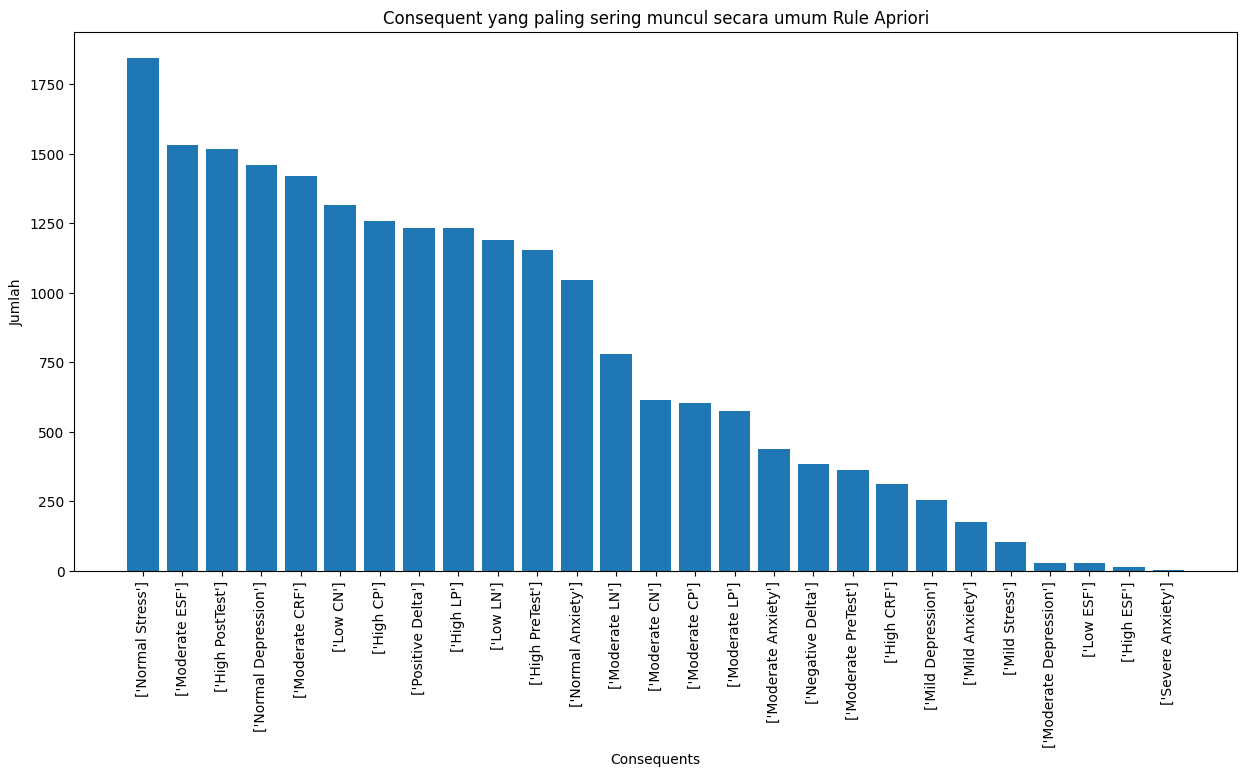

In [ ]:
# Menampilkan consequent yang muncul pada rule secara general
plt.figure(figsize=(15,7))
plt.bar(ap_general["Consequents"], ap_general["counts"], align='center', color="#1f77b4")
plt.xticks(rotation=90)
plt.xlabel('Consequents')
plt.ylabel('Jumlah')
plt.title('Consequent yang paling sering muncul secara umum Rule Apriori')

plt.show()

##### Penjelasan:
Tampilan diatas adalah persebaran dari Consequent yang diperoleh pada proses ekstraksi untuk mengambil rule yang consequentnya adalah semua yang memenuhi confidence dan support minimal tanpa dibatasi apakah consequent tersebut hanya terdapat pada pretest, posttest atau delta saja.

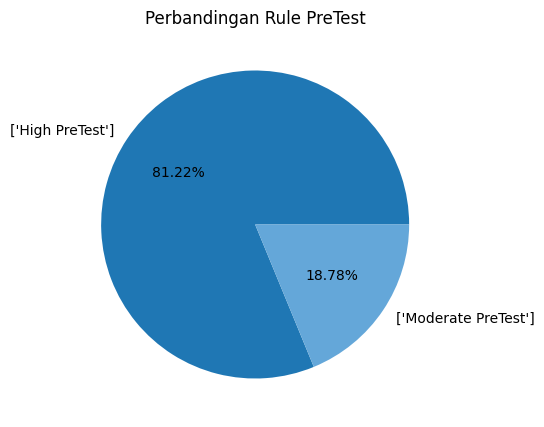

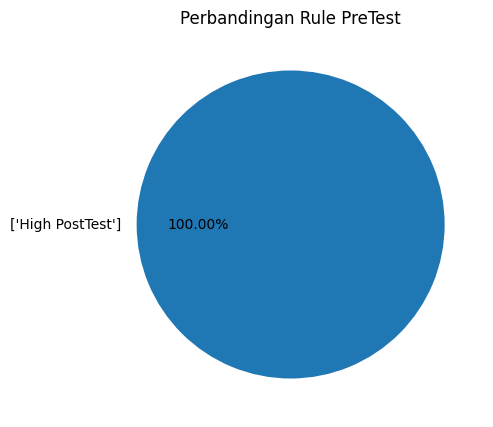

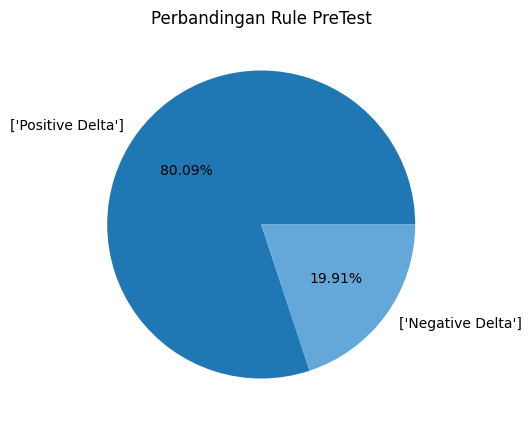

In [ ]:
# Menampilkan persentase rule pada PreTest, PostTest, dan Delta
colors=["#1f77b4","#64a7d9","#9fd8ff"]
plt.figure(figsize=(15,5))
plt.title('Perbandingan Rule PreTest')
plt.pie(ap_pretest["counts"], labels=ap_pretest["Consequents"],autopct='%1.2f%%',colors=colors)
plt.show()

plt.figure(figsize=(15,5))
plt.title('Perbandingan Rule PreTest')
plt.pie(ap_posttest["counts"], labels=ap_posttest["Consequents"],autopct='%1.2f%%',colors=colors)
plt.show()

plt.figure(figsize=(15,5))
plt.title('Perbandingan Rule PreTest')
plt.pie(ap_delta["counts"], labels=ap_delta["Consequents"],autopct='%1.2f%%',colors=colors)
plt.show()

##### Penjelasan:
Tampilan pie chart diatas adalah untuk melihat persentase dari label yang memenuhi syarat minimal support, confidence dan lift. Terlihat High PreTest, High PostTest dan Positive Delta merupakan label yang mayoritas muncul di masing-masing fiturnya. Moderate PreTest dan Negative Delta merupakan label minoritas yang muncul pada PreTest dan Delta. Sedangkan untuk PostTest tidak terdapat label minor lainnya yang muncul.

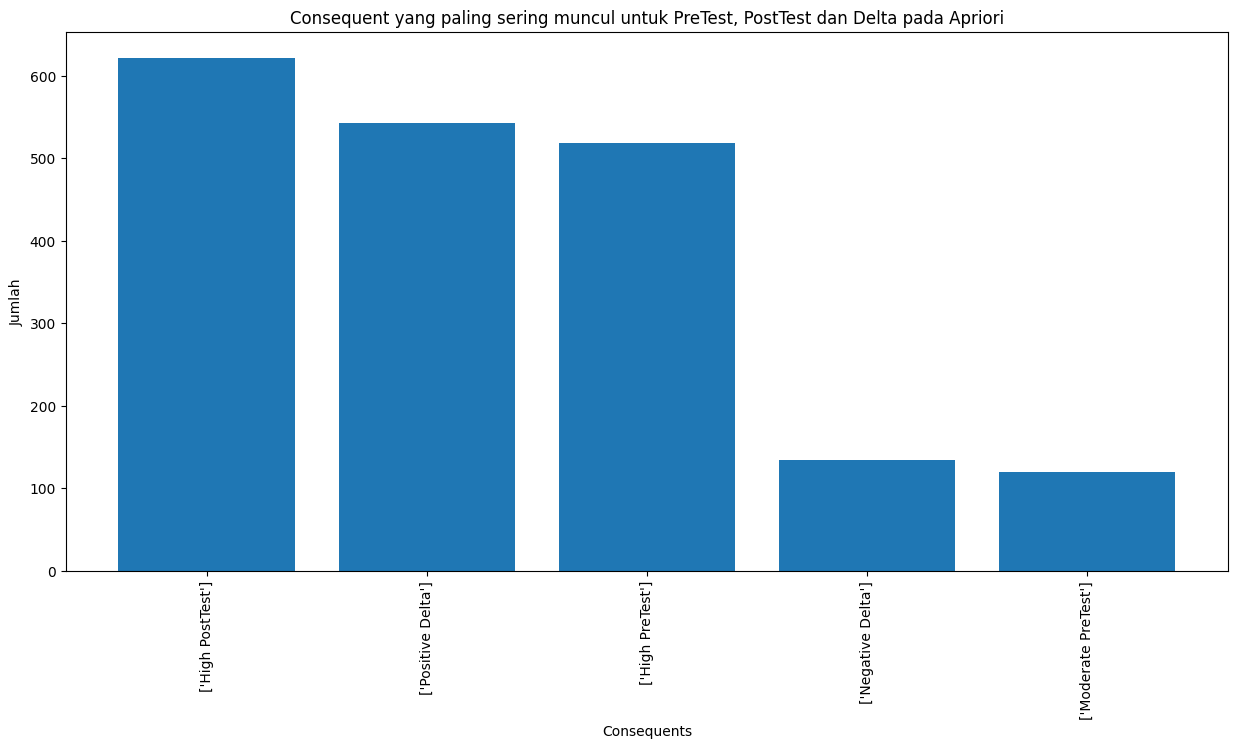

In [ ]:
# Menggabungkan hasil apriori dari pretest, posttest dan delta
ap_vis = ap_pretest.copy()
ap_vis = ap_vis.append(ap_posttest, ignore_index=True)
ap_vis = ap_vis.append(ap_delta, ignore_index=True)
ap_vis = ap_vis.sort_values(by='counts', ascending=False)

# Menampilkan perbandingan jumlah consequent antara PreTest, PostTest, dan Delta
plt.figure(figsize=(15,7))
plt.bar(ap_vis["Consequents"], ap_vis["counts"], align='center', color="#1f77b4")
plt.xticks(rotation=90)
plt.xlabel('Consequents')
plt.ylabel('Jumlah')
plt.title('Consequent yang paling sering muncul untuk PreTest, PostTest dan Delta pada Apriori')

plt.show()

##### Penjelasan:
Tampilan bar chart diatas adalah tampilan perbandingan jumlah masing-masing consequent yang dihasilkan dari algoritma Apriori untuk fitur PreTest, PostTest, dan Delta.

In [ ]:
# Menggabungkan hasil apriori dari pretest, posttest dan delta
ap_combination = apriori_pretest.copy()
ap_combination = ap_combination.append(apriori_posttest, ignore_index=True)
ap_combination = ap_combination.append(apriori_delta, ignore_index=True)

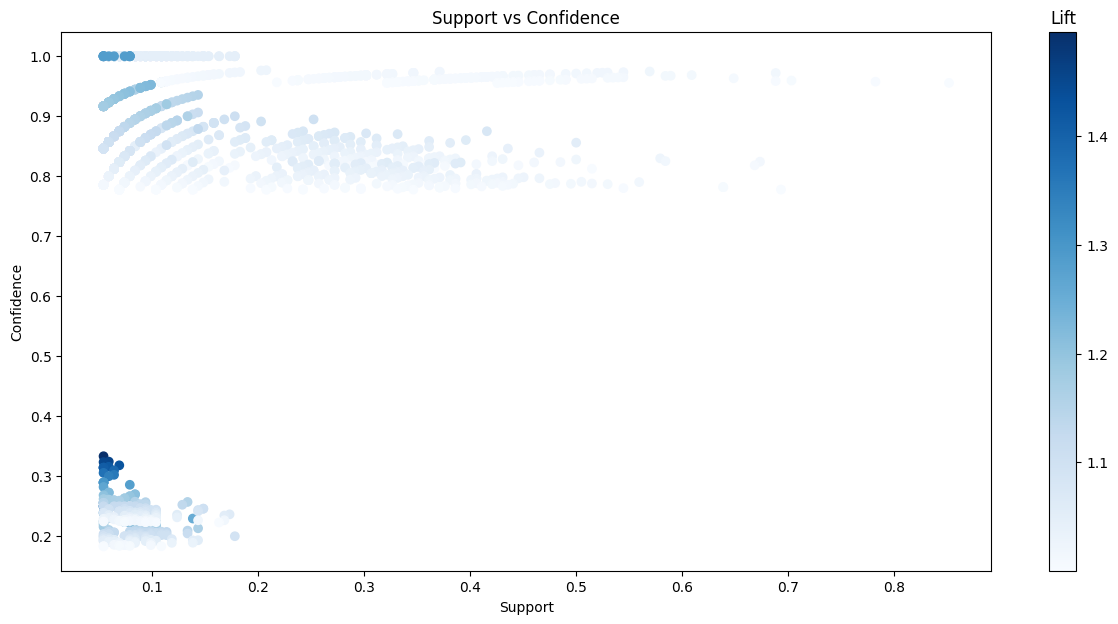

In [ ]:
# Visualisasi scatter-plot untuk melihat relasi support dan confidence
plt.figure(figsize=(15,7))
plt.scatter(ap_combination['Support'], ap_combination['Confidence'],c=ap_combination['Lift'],cmap="Blues")
yeet = plt.colorbar()
yeet.ax.set_title('Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.show()

##### Penjelasan:
Tampilan diatas adalah tampilan relasi antara Support dengan Confidence pada rule yang diperoleh untuk label dari PreTest, PostTest dan Delta yang sudah digabungkan pada algoritma apriori. Terlihat pada scatter plot diatas nilai lift cenderung tinggi pada item dengan support 0.05 dan confidence antara 0.47 hingga 0.6 lebih. Pada item dengan support dan confidence tersebut diperoleh lift yang melebihi 2.2 yang berarti antecedent dan consequent dari item tersebut memiliki relasi yang kuat.

### 3.3.2 FP-Growth

In [ ]:
df_asc_fp = pd.DataFrame()
df_asc_fp["NIM"] =df_asc["NIM"].copy()

# AEQ
df_asc_fp["High CP"]=False
df_asc_fp["Moderate CP"]=False
df_asc_fp["Low CP"]=False
df_asc_fp["High CN"]=False
df_asc_fp["Moderate CN"]=False
df_asc_fp["Low CN"]=False
df_asc_fp["High LP"]=False
df_asc_fp["Moderate LP"]=False
df_asc_fp["Low LP"]=False
df_asc_fp["High LN"]=False
df_asc_fp["Moderate LN"]=False
df_asc_fp["Low LN"]=False

# DASS
df_asc_fp["Normal Depression"]=False
df_asc_fp["Mild Depression"]=False
df_asc_fp["Moderate Depression"]=False
df_asc_fp["Severe Depression"]=False
df_asc_fp["Extremely Severe Depression"]=False
df_asc_fp["Normal Anxiety"]=False
df_asc_fp["Mild Anxiety"]=False
df_asc_fp["Moderate Anxiety"]=False
df_asc_fp["Severe Anxiety"]=False
df_asc_fp["Extremely Severe Anxiety"]=False
df_asc_fp["Normal Stress"]=False
df_asc_fp["Mild Stress"]=False
df_asc_fp["Moderate Stress"]=False
df_asc_fp["Severe Stress"]=False
df_asc_fp["Extremely Severe Stress"]=False

# ERQ
df_asc_fp["High CRF"]=False
df_asc_fp["Moderate CRF"]=False
df_asc_fp["Low CRF"]=False
df_asc_fp["High ESF"]=False
df_asc_fp["Moderate ESF"]=False
df_asc_fp["Low ESF"]=False

# NILAI
df_asc_fp["Low PreTest"]=False
df_asc_fp["Moderate PreTest"]=False
df_asc_fp["High PreTest"]=False
df_asc_fp["Low PostTest"]=False
df_asc_fp["Moderate PostTest"]=False
df_asc_fp["High PostTest"]=False
df_asc_fp["Negative Delta"]=False
df_asc_fp["Neutral Delta"]=False
df_asc_fp["Positive Delta"]=False

##### Penjelasan:
Semua dataset digabung atau dimerger sama seperti apriori. Namun untuk FP-Growth semua label perlu dibuat dalam bentuk nilai biner saja yakni True dan False atau 0 dan 1. Dengan demikian dilakuan binary encoding untuk semua label yang ada pada dataset. Dimana pada awalnya semua fitur diset bernilai False agar lebih mudah nantinya untuk mengisi fitur yang bernilai True.

In [ ]:
df_asc_fp

,NIM,High CP,Moderate CP,Low CP,High CN,Moderate CN,Low CN,High LP,Moderate LP,Low LP,...,Low ESF,Low PreTest,Moderate PreTest,High PreTest,Low PostTest,Moderate PostTest,High PostTest,Negative Delta,Neutral Delta,Positive Delta
0,205150207111012,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,205150200111037,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,205150200111025,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,205150200111067,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,205150201111016,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,195150200111028,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
198,205150601111004,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
199,205150407111030,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
200,205150607111006,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


##### Penjelasan:
Tampilan diatas adalah tampilan awal dataset untuk asosiasi FP-Growth dimana semua fitur nilainya False.

In [ ]:
# AEQ
for i in range (len(df_asc)):
    if(df_asc.loc[i,"Class_Positive"]=="High CP"):
        df_asc_fp.loc[i,"High CP"]=True
    elif(df_asc.loc[i,"Class_Positive"]=="Moderate CP"):
        df_asc_fp.loc[i,"Moderate CP"]=True
    elif(df_asc.loc[i,"Class_Positive"]=="Low CP"):
        df_asc_fp.loc[i,"Low CP"]=True

    if(df_asc.loc[i,"Class_Negative"]=="High CN"):
        df_asc_fp.loc[i,"High CN"]=True
    elif(df_asc.loc[i,"Class_Negative"]=="Moderate CN"):
        df_asc_fp.loc[i,"Moderate CN"]=True
    elif(df_asc.loc[i,"Class_Negative"]=="Low CN"):
        df_asc_fp.loc[i,"Low CN"]=True

    if(df_asc.loc[i,"Learn_Positive"]=="High LP"):
        df_asc_fp.loc[i,"High LP"]=True
    elif(df_asc.loc[i,"Learn_Positive"]=="Moderate LP"):
        df_asc_fp.loc[i,"Moderate LP"]=True
    elif(df_asc.loc[i,"Learn_Positive"]=="Low LP"):
        df_asc_fp.loc[i,"Low LP"]=True

    if(df_asc.loc[i,"Learn_Negative"]=="High LN"):
        df_asc_fp.loc[i,"High LN"]=True
    elif(df_asc.loc[i,"Learn_Negative"]=="Moderate LN"):
        df_asc_fp.loc[i,"Moderate LN"]=True
    elif(df_asc.loc[i,"Learn_Negative"]=="Low LN"):
        df_asc_fp.loc[i,"Low LN"]=True

# DASS
for i in range (len(df_asc)):
    if(df_asc.loc[i,"Depression"]=="Normal Depression"):
        df_asc_fp.loc[i,"Normal Depression"]=True
    elif(df_asc.loc[i,"Depression"]=="Mild Depression"):
        df_asc_fp.loc[i,"Mild Depression"]=True
    elif(df_asc.loc[i,"Depression"]=="Moderate Depression"):
        df_asc_fp.loc[i,"Moderate Depression"]=True
    elif(df_asc.loc[i,"Depression"]=="Severe Depression"):
        df_asc_fp.loc[i,"Severe Depression"]=True
    elif(df_asc.loc[i,"Depression"]=="Extremely Severe Depression"):
        df_asc_fp.loc[i,"Extremely Severe Depression"]=True

    if(df_asc.loc[i,"Anxiety"]=="Normal Anxiety"):
        df_asc_fp.loc[i,"Normal Anxiety"]=True
    elif(df_asc.loc[i,"Anxiety"]=="Mild Anxiety"):
        df_asc_fp.loc[i,"Mild Anxiety"]=True
    elif(df_asc.loc[i,"Anxiety"]=="Moderate Anxiety"):
        df_asc_fp.loc[i,"Moderate Anxiety"]=True
    elif(df_asc.loc[i,"Anxiety"]=="Severe Anxiety"):
        df_asc_fp.loc[i,"Severe Anxiety"]=True
    elif(df_asc.loc[i,"Anxiety"]=="Extremely Severe Anxiety"):
        df_asc_fp.loc[i,"Extremely Severe Anxiety"]=True

    if(df_asc.loc[i,"Stress"]=="Normal Stress"):
        df_asc_fp.loc[i,"Normal Stress"]=True
    elif(df_asc.loc[i,"Stress"]=="Mild Stress"):
        df_asc_fp.loc[i,"Mild Stress"]=True
    elif(df_asc.loc[i,"Stress"]=="Moderate Stress"):
        df_asc_fp.loc[i,"Moderate Stress"]=True
    elif(df_asc.loc[i,"Stress"]=="Severe Stress"):
        df_asc_fp.loc[i,"Severe Stress"]=True
    elif(df_asc.loc[i,"Stress"]=="Extremely Severe Stress"):
        df_asc_fp.loc[i,"Extremely Severe Stress"]=True

# ERQ
for i in range (len(df_asc)):
    if(df_asc.loc[i,"CRF"]=="High CRF"):
        df_asc_fp.loc[i,"High CRF"]=True
    elif(df_asc.loc[i,"CRF"]=="Moderate CRF"):
        df_asc_fp.loc[i,"Moderate CRF"]=True
    elif(df_asc.loc[i,"CRF"]=="Low CRF"):
        df_asc_fp.loc[i,"Low CRF"]=True

    if(df_asc.loc[i,"ESF"]=="High ESF"):
        df_asc_fp.loc[i,"High ESF"]=True
    elif(df_asc.loc[i,"ESF"]=="Moderate ESF"):
        df_asc_fp.loc[i,"Moderate ESF"]=True
    elif(df_asc.loc[i,"ESF"]=="Low ESF"):
        df_asc_fp.loc[i,"Low ESF"]=True

# Nilai
for i in range (len(df_asc)):
    if(df_asc.loc[i,"nilai_pretest"]=="Low PreTest"):
        df_asc_fp.loc[i,"Low PreTest"]=True
    elif(df_asc.loc[i,"nilai_pretest"]=="Moderate PreTest"):
        df_asc_fp.loc[i,"Moderate PreTest"]=True
    elif(df_asc.loc[i,"nilai_pretest"]=="High PreTest"):
        df_asc_fp.loc[i,"High PreTest"]=True

    if(df_asc.loc[i,"nilai_posttest"]=="Low PostTest"):
        df_asc_fp.loc[i,"Low PostTest"]=True
    elif(df_asc.loc[i,"nilai_posttest"]=="Moderate PostTest"):
        df_asc_fp.loc[i,"Moderate PostTest"]=True
    elif(df_asc.loc[i,"nilai_posttest"]=="High PostTest"):
        df_asc_fp.loc[i,"High PostTest"]=True

    if(df_asc.loc[i,"delta"]=="Negative Delta"):
        df_asc_fp.loc[i,"Negative Delta"]=True
    elif(df_asc.loc[i,"delta"]=="Neutral Delta"):
        df_asc_fp.loc[i,"Neutral Delta"]=True
    elif(df_asc.loc[i,"delta"]=="Positive Delta"):
        df_asc_fp.loc[i,"Positive Delta"]=True

##### Penjelasan:
Baris kode diatas adalah kode untuk melakukan binary encoding, apabila label fitur dari dataset df_asc sebelumnya sesuai dengan kolom yang label fitur dataset FP-Growth maka nilainya akan dirubah menjadi True.

In [ ]:
df_fp_test = df_asc_fp.drop(["NIM"], axis=1)
df_fp_test

,High CP,Moderate CP,Low CP,High CN,Moderate CN,Low CN,High LP,Moderate LP,Low LP,High LN,...,Low ESF,Low PreTest,Moderate PreTest,High PreTest,Low PostTest,Moderate PostTest,High PostTest,Negative Delta,Neutral Delta,Positive Delta
0,False,True,False,False,False,True,True,False,False,False,...,False,False,False,True,False,False,True,False,False,True
1,False,True,False,False,False,True,True,False,False,False,...,False,False,False,True,False,False,True,False,False,True
2,False,True,False,False,True,False,False,True,False,False,...,False,False,False,True,False,False,True,False,False,True
3,True,False,False,False,False,True,True,False,False,False,...,False,False,False,True,False,False,True,False,False,True
4,True,False,False,False,False,True,False,True,False,False,...,False,False,False,True,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,True,False,False,False,False,True,True,False,False,False,...,False,False,False,True,False,False,True,False,False,True
198,True,False,False,False,False,True,True,False,False,False,...,False,False,False,True,False,False,True,False,False,True
199,True,False,False,False,False,True,True,False,False,False,...,False,False,False,True,False,False,True,False,False,True
200,True,False,False,False,False,True,True,False,False,False,...,False,False,False,True,False,True,False,True,False,False


##### Penjelasan:
Tampilan diatas adalah tampilan dataframe untuk FP-Growth setelah melakukan binary encoding.

In [ ]:
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules
#https://coderspacket.com/implementing-fp-growth-algorithm-in-machine-learning-using-python
#http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/fpgrowth/

from mlxtend.frequent_patterns import fpgrowth

# Menjalankan algoritma apriori dan menghitung waktu eksekusinya
st = time.time()
frequent_itemset=fpgrowth(df_fp_test, min_support=0.05,max_len=5, use_colnames=True)
rules_fp=association_rules(frequent_itemset, metric="confidence",min_threshold=0.1)
et = time.time()
elapsed_time_fpgrowth = et - st
len_fpgrowth=len(rules_fp)
print(len_fpgrowth)

141375


##### Penjelasan:
Kode program diatas adalah kode untuk memanggil fungsi fpgrowth dari library mlxtend. Pada kode tersebut nilai parameter yang digunakan sama dengan apriori dimana nilai minimal support yang digunakan adalah 0.05 dan minimal confidence sebesar 0.1 serta lift sebesar 1. Untuk nilai maximum length atau panjang antecedent maksimumnya adalah 5 karena jika nilai max length lebih dari 5 maka instance notebook akan kehabisan memori. Dari penjalanan kode diatas diperoleh itemset sebanyak 136830.

In [ ]:
rules_fp

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(High PostTest),(Normal Stress),0.955446,0.891089,0.851485,0.891192,1.000115,0.000098,1.000943
1,(Normal Stress),(High PostTest),0.891089,0.955446,0.851485,0.955556,1.000115,0.000098,1.002475
2,(Moderate CRF),(High PostTest),0.816832,0.955446,0.777228,0.951515,0.995886,-0.003210,0.918936
3,(High PostTest),(Moderate CRF),0.955446,0.816832,0.777228,0.813472,0.995886,-0.003210,0.981986
4,(Moderate CRF),(Normal Stress),0.816832,0.891089,0.742574,0.909091,1.020202,0.014704,1.198020
...,...,...,...,...,...,...,...,...,...
141370,"(Moderate ESF, Moderate PreTest)","(Moderate CRF, Normal Stress, Moderate LN)",0.138614,0.292079,0.054455,0.392857,1.345036,0.013969,1.165987
141371,"(Moderate CRF, Moderate PreTest)","(Normal Stress, Moderate LN, Moderate ESF)",0.143564,0.267327,0.054455,0.379310,1.418902,0.016077,1.180418
141372,"(Normal Stress, Moderate PreTest)","(Moderate CRF, Moderate LN, Moderate ESF)",0.178218,0.297030,0.054455,0.305556,1.028704,0.001519,1.012277
141373,(Moderate LN),"(Moderate CRF, Normal Stress, Moderate ESF, Mo...",0.405941,0.113861,0.054455,0.134146,1.178155,0.008234,1.023428


##### Penjelasan:
Tampilan diatas adalah tampilan dari variabel rules_fp, pada variabel tersebut terdapat RelationRecord yang berisikan itemset yang memiliki relasi. Kemudian ordered_statistics berisikan relasi yang ada, dimana item_base merupakan antecedent dan item_add merupakan consequent. Maka pada sebuah itemset terdapat beberapa ordered_statistics yang merupakan asosiasi dari setiap item.

In [ ]:
# Membuat sebuah dataframe baru untuk menyimpan nilai dari setiap fitur
fpgrowth_general=pd.DataFrame()
fpgrowth_general['Antecedents'] = None
fpgrowth_general['Consequents'] = None
fpgrowth_general['Support'] = None
fpgrowth_general['Confidence'] = None
fpgrowth_general['Lift'] = None

# Kode program dibawah digunakan untuk ekstraksi nilai fitur dan disimpan ke dataframe sebelumnya
for i in range(len(rules_fp)):

    test = rules_fp.loc[i,"consequents"]
    len_test = len(test)
    lif=rules_fp.loc[i,"lift"]
    if (lif>1 and len_test==1):
        ant=list(rules_fp.loc[i,"antecedents"])
        con=list(rules_fp.loc[i,"consequents"])
        sup=rules_fp.loc[i,"support"]
        cnf=rules_fp.loc[i,"confidence"]
        
        fpgrowth_general.loc[len(fpgrowth_general)] = [ant,con,sup,cnf,lif] 
    else:
        continue

# Mengurutkan tabel berdasarkan nilai lift       
fpgrowth_general["Consequents"] = pd.Series(fpgrowth_general["Consequents"], dtype="string")
fpgrowth_general= fpgrowth_general.sort_values(by='Lift', ascending=False)
fpgrowth_general["Consequents"].unique()


<StringArray>
[        "['Mild Stress']",         "['Moderate LP']",
     "['Mild Depression']",            "['High CRF']",
            "['High ESF']",         "['Moderate CP']",
    "['Moderate Anxiety']",         "['Moderate CN']",
 "['Moderate Depression']",         "['Moderate LN']",
        "['Mild Anxiety']",      "['Negative Delta']",
    "['Moderate PreTest']",      "['Severe Anxiety']",
              "['Low LN']",      "['Normal Anxiety']",
             "['Low ESF']",              "['Low CN']",
             "['High CP']",             "['High LP']",
   "['Normal Depression']",      "['Positive Delta']",
        "['High PreTest']",        "['Moderate CRF']",
        "['Moderate ESF']",       "['Normal Stress']",
       "['High PostTest']"]
Length: 27, dtype: string

##### Penjelasan:
Kode program diatas berguna untuk mengekstrak asosiasi yang terdapat untuk semua consequent, diperoleh 27 consequent unik dari proses ekstraksi ini.

In [ ]:
fp_general = fpgrowth_general["Consequents"].value_counts().rename_axis('Consequents').reset_index(name='counts')
fp_general

,Consequents,counts
0,['Normal Stress'],1846
1,['Moderate ESF'],1533
2,['High PostTest'],1518
3,['Normal Depression'],1460
4,['Moderate CRF'],1421
5,['Low CN'],1317
6,['High CP'],1257
7,['Positive Delta'],1233
8,['High LP'],1232
9,['Low LN'],1189


##### Penjelasan:
Kode program diatas berguna untuk menampilkan berapa banyak jumlah consequent yang diperoleh.

In [ ]:
# Membuat sebuah dataframe baru untuk menyimpan nilai dari setiap fitur
fpgrowth_pretest=pd.DataFrame()
fpgrowth_pretest['Antecedents'] = None
fpgrowth_pretest['Consequents'] = None
fpgrowth_pretest['Support'] = None
fpgrowth_pretest['Confidence'] = None
fpgrowth_pretest['Lift'] = None

# Kode program dibawah digunakan untuk ekstraksi nilai fitur dan disimpan ke dataframe sebelumnya
for i in range(len(rules_fp)):
    low_pt = frozenset(["Low PreTest"])
    moderate_pt = frozenset(['Moderate PreTest'])
    high_pt = frozenset(['High PreTest'])

    ant=list(rules_fp.loc[i,"antecedents"])

    if (("Low PreTest" in ant) or ('Moderate PreTest' in ant) or ('High PreTest' in ant) or ("Low PostTest" in ant) or 
        ('Moderate PostTest' in ant) or ('High PostTest' in ant) or ("Negative Delta" in ant) or ('Positive Delta' in ant)):
        continue

    test = rules_fp.loc[i,"consequents"]
    lif=rules_fp.loc[i,"lift"]
    if (((test==low_pt) or (test==moderate_pt) or (test==high_pt)) and (lif>1)):
        con=list(rules_fp.loc[i,"consequents"])
        sup=rules_fp.loc[i,"support"]
        cnf=rules_fp.loc[i,"confidence"]
        
        fpgrowth_pretest.loc[len(fpgrowth_pretest)] = [ant,con,sup,cnf,lif] 
    else:
        continue

# Mengurutkan tabel berdasarkan nilai lift
fpgrowth_pretest["Consequents"] = pd.Series(fpgrowth_pretest["Consequents"], dtype="string")
fpgrowth_pretest = fpgrowth_pretest.sort_values(by='Lift', ascending=False)
fpgrowth_pretest = fpgrowth_pretest.reset_index(drop=True)

In [ ]:
fp_pretest = fpgrowth_pretest["Consequents"].value_counts().rename_axis('Consequents').reset_index(name='counts')
fp_pretest

,Consequents,counts
0,['High PreTest'],519
1,['Moderate PreTest'],120


##### Penjelasan:
Setelah menjalankan kode program untuk proses ekstraksi, diperoleh dua consequent yakni High PreTest dan Moderate PreTest.

In [ ]:
# Membuat sebuah dataframe baru untuk menyimpan nilai dari setiap fitur
fpgrowth_posttest=pd.DataFrame()
fpgrowth_posttest['Antecedents'] = None
fpgrowth_posttest['Consequents'] = None
fpgrowth_posttest['Support'] = None
fpgrowth_posttest['Confidence'] = None
fpgrowth_posttest['Lift'] = None

# Kode program dibawah digunakan untuk ekstraksi nilai fitur dan disimpan ke dataframe sebelumnya
for i in range(len(rules_fp)):
    low_po = frozenset(["Low PostTest"])
    moderate_po = frozenset(['Moderate PostTest'])
    high_po = frozenset(['High PostTest'])

    ant=list(rules_fp.loc[i,"antecedents"])
    con_in_ant=0
    if (("Low PreTest" in ant) or ('Moderate PreTest' in ant) or ('High PreTest' in ant) or ("Low PostTest" in ant) or 
        ('Moderate PostTest' in ant) or ('High PostTest' in ant) or ("Negative Delta" in ant) or ('Positive Delta' in ant)):
        continue

    test = rules_fp.loc[i,"consequents"]
    lif=rules_fp.loc[i,"lift"]
    if (((test==low_po) or (test==moderate_po) or (test==high_po)) and (lif>1) and con_in_ant==0):
        ant=list(rules_fp.loc[i,"antecedents"])
        con=list(rules_fp.loc[i,"consequents"])
        sup=rules_fp.loc[i,"support"]
        cnf=rules_fp.loc[i,"confidence"]
        
        fpgrowth_posttest.loc[len(fpgrowth_posttest)] = [ant,con,sup,cnf,lif] 
    else:
        continue

# Mengurutkan tabel berdasarkan nilai lift
fpgrowth_posttest["Consequents"] = pd.Series(fpgrowth_posttest["Consequents"], dtype="string")
fpgrowth_posttest = fpgrowth_posttest.sort_values(by='Lift', ascending=False)
fpgrowth_posttest = fpgrowth_posttest.reset_index(drop=True)

In [ ]:
fp_posttest = fpgrowth_posttest["Consequents"].value_counts().rename_axis('Consequents').reset_index(name='counts')
fp_posttest

,Consequents,counts
0,['High PostTest'],622


##### Penjelasan:
Setelah menjalankan kode program untuk proses ekstraksi, diperoleh hanya satu consequent saja yakni High PostTest.

In [ ]:
# Membuat sebuah dataframe baru untuk menyimpan nilai dari setiap fitur
fpgrowth_delta=pd.DataFrame()
fpgrowth_delta['Antecedents'] = None
fpgrowth_delta['Consequents'] = None
fpgrowth_delta['Support'] = None
fpgrowth_delta['Confidence'] = None
fpgrowth_delta['Lift'] = None

# Kode program dibawah digunakan untuk ekstraksi nilai fitur dan disimpan ke dataframe sebelumnya
for i in range(len(rules_fp)):
    low_dt = frozenset(["Negative Delta"])
    high_dt = frozenset(['Positive Delta'])

    ant=list(rules_fp.loc[i,"antecedents"])
    if (("Low PreTest" in ant) or ('Moderate PreTest' in ant) or ('High PreTest' in ant) or ("Low PostTest" in ant) or 
        ('Moderate PostTest' in ant) or ('High PostTest' in ant) or ("Negative Delta" in ant) or ('Positive Delta' in ant)):
        continue

    test = rules_fp.loc[i,"consequents"]
    lif=rules_fp.loc[i,"lift"]
    if (((test==low_dt) or (test==high_dt)) and (lif>1)):
        ant=list(rules_fp.loc[i,"antecedents"])
        con=list(rules_fp.loc[i,"consequents"])
        sup=rules_fp.loc[i,"support"]
        cnf=rules_fp.loc[i,"confidence"]
        
        fpgrowth_delta.loc[len(fpgrowth_delta)] = [ant,con,sup,cnf,lif] 
    else:
        continue

# Mengurutkan tabel berdasarkan nilai lift
fpgrowth_delta["Consequents"] = pd.Series(fpgrowth_delta["Consequents"], dtype="string")
fpgrowth_delta = fpgrowth_delta.sort_values(by='Lift', ascending=False)
fpgrowth_delta = fpgrowth_delta.reset_index(drop=True)

In [ ]:
fp_delta = fpgrowth_delta["Consequents"].value_counts().rename_axis('Consequents').reset_index(name='counts')
fp_delta

,Consequents,counts
0,['Positive Delta'],543
1,['Negative Delta'],135


##### Penjelasan:
Setelah menjalankan kode program untuk proses ekstraksi, diperoleh dua consequent yakni Positive Delta dan Negative Delta.

#### Visualisasi

In [ ]:
# Membuat antecedent dan consequent dalam bentuk asosiasi
rule_fp_general=pd.DataFrame()
rule_fp_pretest=pd.DataFrame()
rule_fp_posttest=pd.DataFrame()
rule_fp_delta=pd.DataFrame()
rule_fp_general["Rule"] = fpgrowth_general["Antecedents"].astype(str) + ' --> ' + fpgrowth_general["Consequents"].astype(str)
rule_fp_pretest["Rule"] = fpgrowth_pretest["Antecedents"].astype(str) + ' --> ' + fpgrowth_pretest["Consequents"].astype(str)
rule_fp_posttest["Rule"] = fpgrowth_posttest["Antecedents"].astype(str) + ' --> ' + fpgrowth_posttest["Consequents"].astype(str)
rule_fp_delta["Rule"] = fpgrowth_delta["Antecedents"].astype(str) + ' --> ' + fpgrowth_delta["Consequents"].astype(str)

##### Penjelasan:
Baris kode program diatas berfungsi untuk membuat pola asosiasi antara antecedent dan consequent untuk hasil fp-growth secara umum, pretest, posttest, dan delta.

In [ ]:
rule_fp_general = rule_fp_general.reset_index(drop=True)
rule_fp_general

,Rule
0,"['High LP', 'Moderate ESF', 'Moderate CN', 'Hi..."
1,"['High PostTest', 'High LP', 'Moderate CN', 'H..."
2,"['High LP', 'Moderate CN', 'High PreTest'] -->..."
3,"['High PostTest', 'High LP', 'Moderate ESF', '..."
4,"['Moderate CN', 'High LP', 'Moderate ESF'] -->..."
...,...
20882,['Normal Stress'] --> ['High PostTest']
20883,"['Moderate CRF', 'Low LN', 'Normal Stress'] --..."
20884,['High PostTest'] --> ['Normal Stress']
20885,"['High PostTest', 'Normal Depression'] --> ['M..."


In [ ]:
rule_fp_pretest = rule_fp_pretest.reset_index(drop=True)
rule_fp_pretest

,Rule
0,"['Moderate CRF', 'Normal Stress', 'Moderate ES..."
1,"['Normal Stress', 'Moderate ESF', 'Moderate LP..."
2,"['Moderate CRF', 'Moderate ESF', 'Moderate LP'..."
3,"['Moderate ESF', 'Moderate LP'] --> ['Moderate..."
4,"['Normal Stress', 'Moderate LP'] --> ['Moderat..."
...,...
634,"['Low LN', 'Moderate Anxiety'] --> ['High PreT..."
635,"['High CRF', 'Normal Depression', 'High LP', '..."
636,"['High CRF', 'Normal Depression', 'High CP', '..."
637,"['High CRF', 'Normal Depression', 'Normal Stre..."


In [ ]:
rule_fp_posttest = rule_fp_posttest.reset_index(drop=True)
rule_fp_posttest

,Rule
0,"['Mild Anxiety', 'Normal Stress', 'High LP'] -..."
1,"['High CRF', 'Low CN'] --> ['High PostTest']"
2,"['Normal Depression', 'Low CN', 'Low ESF'] -->..."
3,"['Normal Stress', 'Low CN', 'Low ESF'] --> ['H..."
4,"['Normal Depression', 'Normal Stress', 'Low CN..."
...,...
617,"['Normal Depression', 'High CP', 'Moderate ESF..."
618,"['Moderate CRF', 'Normal Depression', 'Low LN'..."
619,"['Moderate CRF', 'Low LN', 'Normal Stress'] --..."
620,"['High CP', 'Normal Stress', 'High LP', 'Low C..."


In [ ]:
rule_fp_delta = rule_fp_delta.reset_index(drop=True)
rule_fp_delta

,Rule
0,"['Normal Depression', 'Moderate LN', 'Moderate..."
1,"['Normal Depression', 'Moderate LN', 'Moderate..."
2,"['Moderate CP', 'Normal Depression', 'Moderate..."
3,"['Normal Depression', 'Moderate LN'] --> ['Neg..."
4,"['Normal Depression', 'Moderate CN'] --> ['Neg..."
...,...
673,"['Moderate CP', 'Moderate ESF', 'Moderate CN']..."
674,"['Moderate Anxiety', 'High LP', 'Moderate ESF'..."
675,"['Moderate CRF', 'Moderate CN', 'Moderate LP']..."
676,"['Moderate CRF', 'Normal Depression', 'High LP..."


##### Penjelasan:
Keempat tampilan diatas adalah tampilan pola asosiasi yang diperoleh.

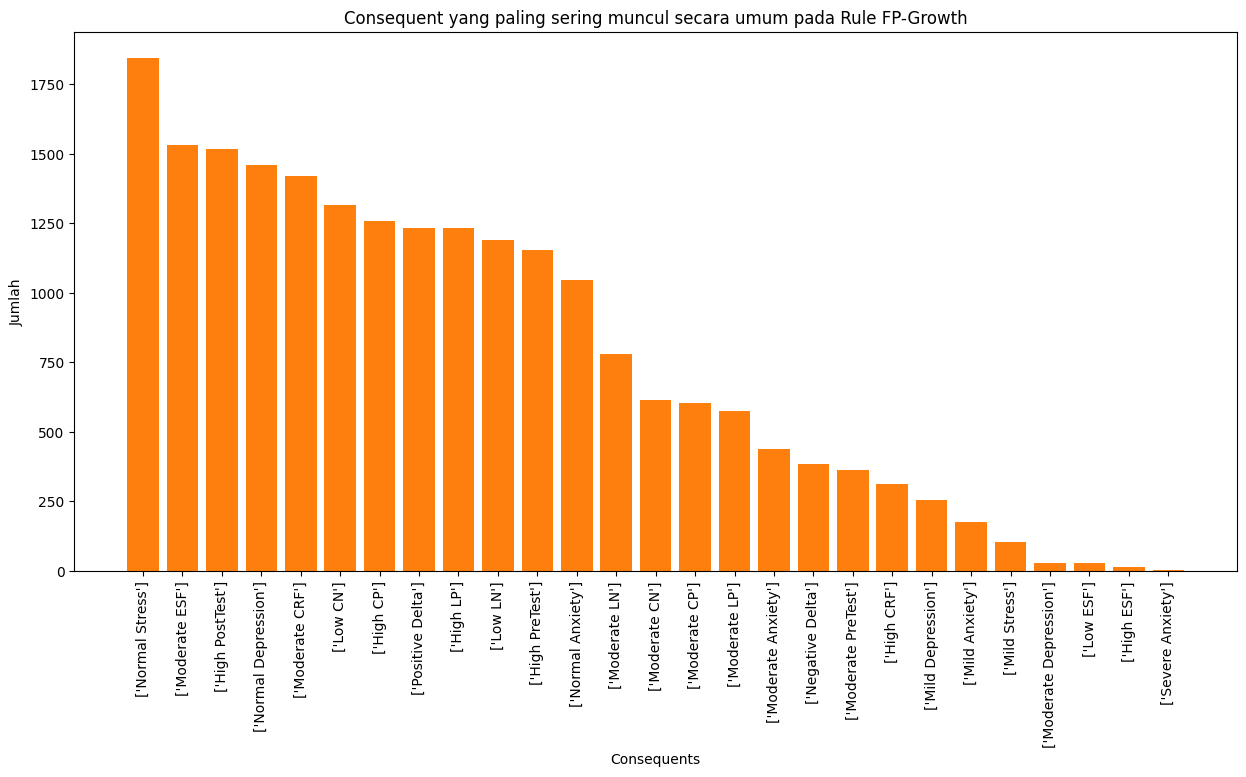

In [ ]:
# Menampilkan perbandingan jumlah consequent secara umum
plt.figure(figsize=(15,7))
plt.bar(fp_general["Consequents"], fp_general["counts"], align='center', color="#ff7f0e")
plt.xticks(rotation=90)
plt.xlabel('Consequents')
plt.ylabel('Jumlah')
plt.title('Consequent yang paling sering muncul secara umum pada Rule FP-Growth')

plt.show()

##### Penjelasan:
Tampilan diatas adalah persebaran dari Consequent untuk algoritma FP-Growth yang diperoleh pada proses ekstraksi untuk mengambil rule yang consequentnya adalah semua yang memenuhi confidence dan support minimal tanpa dibatasi apakah consequent tersebut hanya terdapat pada pretest, posttest atau delta saja. 

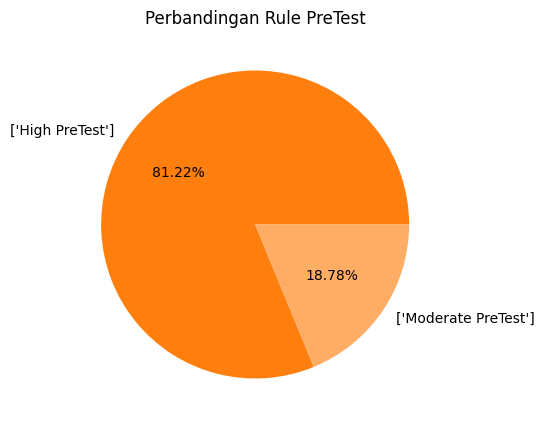

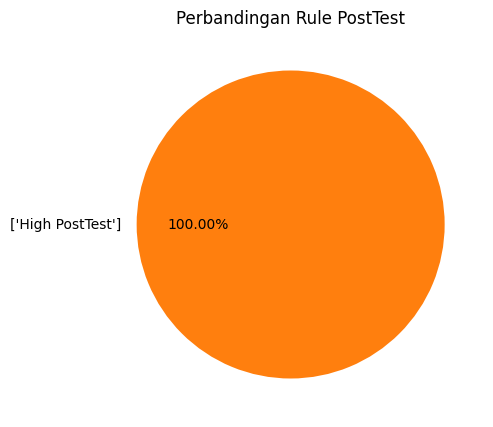

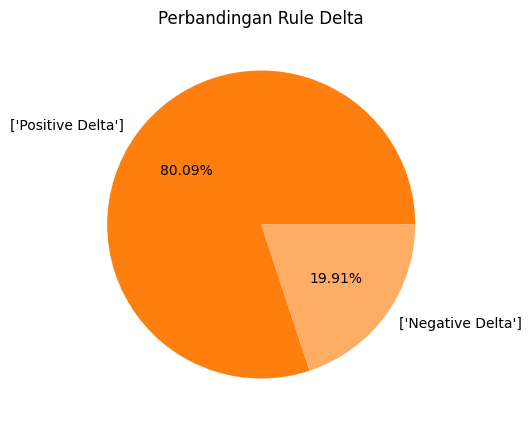

In [ ]:
# Menampilkan persebaran consequent pada PreTest, PostTest, dan Delta
colors=["#ff7f0e","#ffad65","#ffd6b1"]
plt.figure(figsize=(15,5))
plt.title('Perbandingan Rule PreTest')
plt.pie(fp_pretest["counts"], labels=fp_pretest["Consequents"],autopct='%1.2f%%',colors=colors)
plt.show()

plt.figure(figsize=(15,5))
plt.title('Perbandingan Rule PostTest')
plt.pie(fp_posttest["counts"], labels=fp_posttest["Consequents"],autopct='%1.2f%%',colors=colors)
plt.show()

plt.figure(figsize=(15,5))
plt.title('Perbandingan Rule Delta')
plt.pie(fp_delta["counts"], labels=fp_delta["Consequents"],autopct='%1.2f%%',colors=colors)
plt.show()

##### Penjelasan:
Tampilan pie chart yang diperoleh untuk algoritma FP-Growth kurang lebih memiliki hasil yang sama dengan Apriori. Terlihat High PreTest, High PostTest dan Positive Delta merupakan label yang mayoritas muncul di masing-masing fiturnya. Moderate PreTest dan Negative Delta merupakan label minoritas yang muncul pada PreTest dan Delta. Sedangkan untuk PostTest juga tidak terdapat label minor lainnya yang muncul.

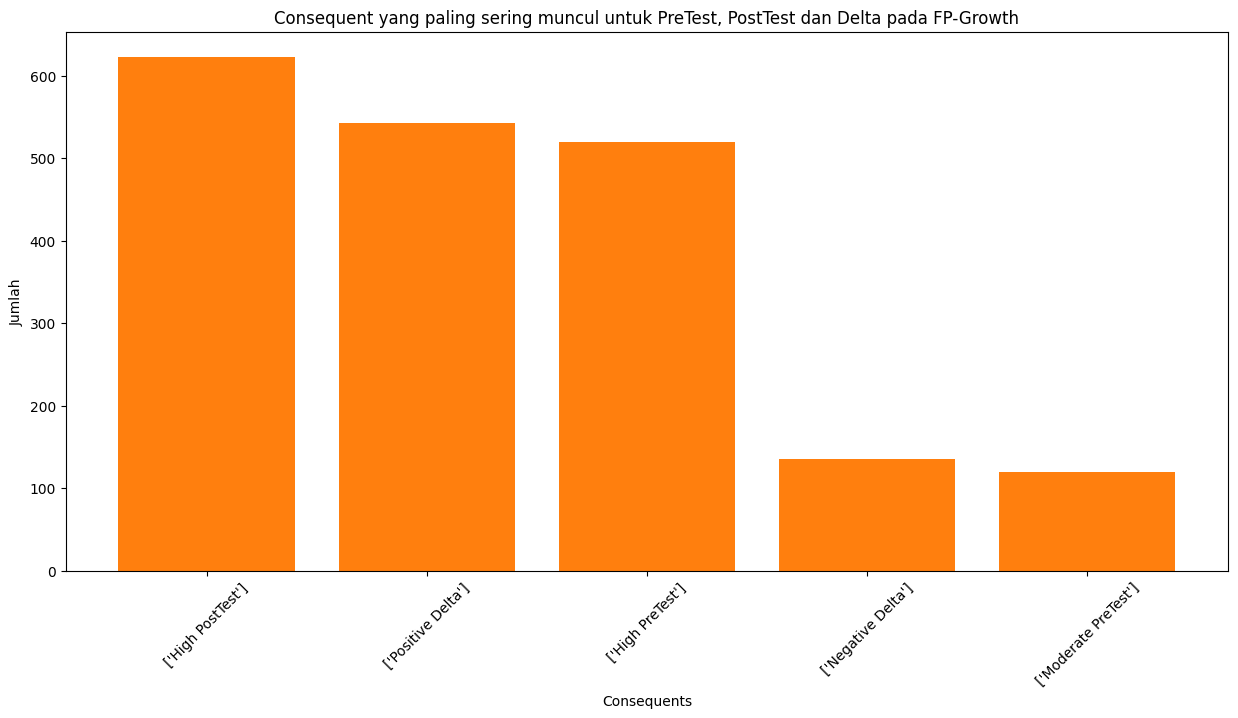

In [ ]:
#Menggabungkan hasil fp-growth dari pretest, posttest dan delta
fp_vis = fp_pretest.copy()
fp_vis = fp_vis.append(fp_posttest, ignore_index=True)
fp_vis = fp_vis.append(fp_delta, ignore_index=True)
fp_vis = fp_vis.sort_values(by='counts', ascending=False)

# Menampilkan perbandingan jumlah consequent antara PreTest, PostTest, dan Delta
plt.figure(figsize=(15,7))
plt.bar(fp_vis["Consequents"], fp_vis["counts"], align='center', color="#ff7f0e")
plt.xticks(rotation=45)
plt.xlabel('Consequents')
plt.ylabel('Jumlah')
plt.title('Consequent yang paling sering muncul untuk PreTest, PostTest dan Delta pada FP-Growth')

plt.show()

##### Penjelasan:
Tampilan bar chart diatas adalah tampilan perbandingan jumlah masing-masing consequent yang dihasilkan dari algoritma FP-Growth untuk fitur PreTest, PostTest, dan Delta.

In [ ]:
# Menggabungkan hasil fp-growth dari pretest, posttest dan delta
fp_combination = fpgrowth_pretest.copy()
fp_combination = fp_combination.append(fpgrowth_posttest, ignore_index=True)
fp_combination = fp_combination.append(fpgrowth_delta, ignore_index=True)

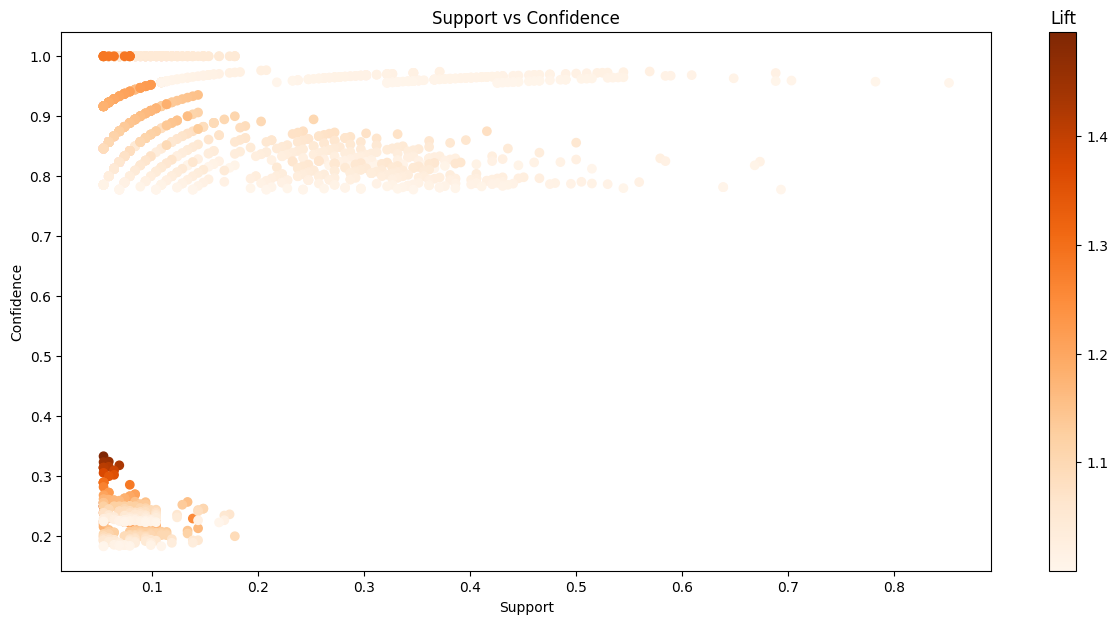

In [ ]:
# Visualisasi relasi antara support dan confidence
plt.figure(figsize=(15,7))
plt.scatter(fp_combination["Support"], fp_combination['Confidence'],c=fp_combination['Lift'],cmap="Oranges")
yeet = plt.colorbar()
yeet.ax.set_title('Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.show()

##### Penjelasan:
Tampilan diatas adalah tampilan relasi antara Support dengan Confidence pada rule yang diperoleh untuk label dari PreTest, PostTest dan Delta yang sudah digabungkan pada algoritma FP-Growth. Terlihat pada scatter plot diatas memiliki hasil yang mirip dengan algoritma apriori dimana nilai lift cenderung tinggi pada item dengan support 0.05 dan confidence antara 0.47 hingga 0.6 lebih. Pada item dengan support dan confidence tersebut diperoleh lift yang melebihi 2.2 yang berarti antecedent dan consequent dari item tersebut memiliki relasi yang kuat.

### 3.3.3 Evaluasi Algoritma Apriori dan FP-Growth

In [ ]:
data_cmp = {
  "Algorithm": ["Apriori", "FP-Growth"],
  "Execution Time": [elapsed_time_apriori,elapsed_time_fpgrowth],
  "Rule General": [len(apriori_general),len(fpgrowth_general)]
#   "Rule PreTest": [len(apriori_pretest),len(fpgrowth_pretest)],
#   "Rule PostTest": [len(apriori_posttest),len(fpgrowth_posttest)],
#   "Rule Delta": [len(apriori_delta),len(fpgrowth_delta)],
}
df_cmp = pd.DataFrame(data_cmp)
df_cmp

,Algorithm,Execution Time,Rule General
0,Apriori,1.747204,20887
1,FP-Growth,1.116887,20887


#### Perbandingan waktu eksekusi dan jumlah rule pada kedua algoritma

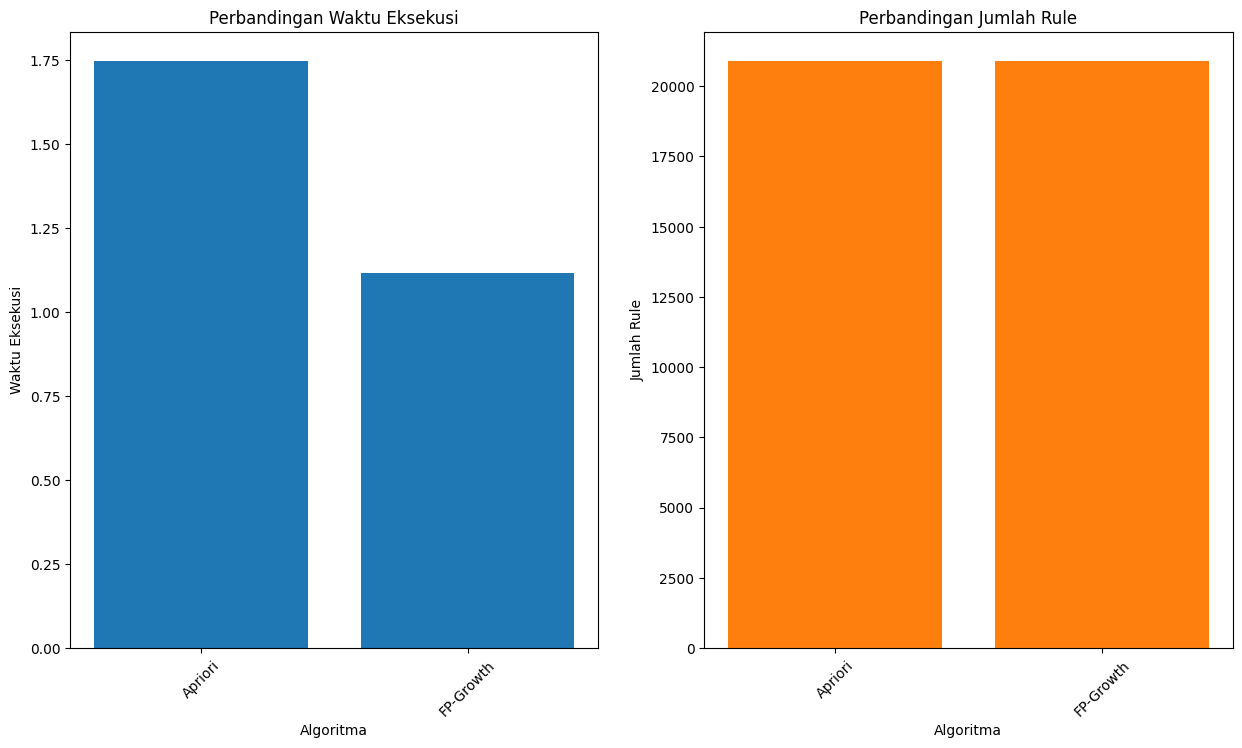

In [ ]:
# Visualisasi perbandingan waktu eksekusi
fig = plt.figure(figsize=(15, 8))
fig.add_subplot(1, 2, 1)
plt.bar(df_cmp["Algorithm"], df_cmp["Execution Time"], align='center', color="#1f77b4")
plt.xticks(rotation=45)
plt.xlabel('Algoritma')
plt.ylabel('Waktu Eksekusi')
plt.title('Perbandingan Waktu Eksekusi')

# Visualisasi perbandingan jumlah rule
fig.add_subplot(1, 2, 2)
plt.bar(df_cmp["Algorithm"], df_cmp["Rule General"], align='center', color="#ff7f0e")
plt.xticks(rotation=45)
plt.xlabel('Algoritma')
plt.ylabel('Jumlah Rule')
plt.title('Perbandingan Jumlah Rule')

plt.show()

##### Penjelasan:
Tampilan diatas adalah perbandingan waktu eksekusi dan jumlah rule yang dihasilkan antara algoritma Apriori dengan FP-Growth, dimana parameternya sama yakni minimal support sebesar 0.05, minimal confidence sebesar 0.1, dan lift sebesar 1. Waktu eksekusi FP-Growth lebih singkat dibandingkan FP-Growth yakni antara 1 sampai kurang lebih 1.25 detik saja. Sedangkan algoritma Apriori memakan waktu eksekusi sebesar 1.7 detik lebih. Dari jumlah rule yang diperoleh pada algoritma Apriori dengan FP-Growth. Dengan menggunakan nilai support, confidence dan lift yang sama maka diperoleh jumlah rule yang sama.

#### Evaluasi Algoritma dengan perbedaan nilai support, confidence, dan lift

In [ ]:
labelcmp=["Method","supp","conf","lift","elapsed_time","rule_count"]

# Fungsi untuk menghitung waktu eksekusi dan jumlah rule pada algoritma apriori
def ap_time_cmp(supp,conf,lift,df_input,method):
    st = time.time()
    association_rules = apriori(data,min_support=supp,min_confidence=conf,min_lift=lift,max_length=5)
    association_results=list(association_rules)
    ap_result = pd.DataFrame(columns=('Antecedents','Consequents','Support','Confidence','Lift'))

    Support =[]
    Confidence = []
    Lift = []
    Antecedents = []
    Consequents =[]

    # Kode program dibawah digunakan untuk ekstraksi nilai fitur
    for RelationRecord in association_results:
        for ordered_stat in RelationRecord.ordered_statistics:
            ante = list(ordered_stat.items_base)
            ant_len = len(ante)
            conse = list(ordered_stat.items_add)
            con_len = len(conse)
            if(ordered_stat.lift>1):
                Support.append(RelationRecord.support)
                Antecedents.append(ante)
                Consequents.append(conse)
                Confidence.append(ordered_stat.confidence)
                Lift.append(ordered_stat.lift)
            else:
                continue

    # Memasukan nilai dari variabel fitur sementara ke dalam dataframe                                
    ap_result['Antecedents'] = Antecedents
    ap_result['Consequents'] = Consequents
    ap_result['Support'] = Support
    ap_result['Confidence'] = Confidence
    ap_result['Lift']= Lift
    ap_result['Consequents']=pd.Series(ap_result['Consequents'], dtype="string")
    ap_result = ap_result.sort_values(by='Lift', ascending=False)

    et = time.time()
    elapsed_time = et - st
    rule_count = len(ap_result)
    df_insert = pd.DataFrame([[method,supp,conf,lift,elapsed_time,rule_count]], columns=labelcmp)
    df_input = pd.concat([df_insert, df_input])
    return df_input



In [ ]:
# Fungsi untuk menghitung waktu eksekusi dan jumlah rule pada algoritma fp-growth
def fp_time_cmp(supp,conf,lift,df_input,method):
    st = time.time()
    frequent_itemset=fpgrowth(df_fp_test, min_support=supp,max_len=5, use_colnames=True)
    rules_tmp=association_rules(frequent_itemset, metric='lift',min_threshold=lift)
    rules_fp=rules_tmp[(rules_tmp['confidence'] >= conf) ]
    et = time.time()
    elapsed_time = et - st
    rule_count = len(rules_fp)
    df_insert = pd.DataFrame([[method,supp,conf,lift,elapsed_time,rule_count]], columns=labelcmp)
    df_input = pd.concat([df_insert, df_input])
    return df_input

In [ ]:
df_lift_cmp = pd.DataFrame(columns=labelcmp)
df_lift_cmp =fp_time_cmp(0.05,0.5,1,df_lift_cmp,"FP-Growth")
df_lift_cmp =fp_time_cmp(0.05,0.5,1.2,df_lift_cmp,"FP-Growth")
df_lift_cmp =fp_time_cmp(0.05,0.5,1.4,df_lift_cmp,"FP-Growth")
df_lift_cmp =fp_time_cmp(0.05,0.5,1.6,df_lift_cmp,"FP-Growth")
df_lift_cmp =fp_time_cmp(0.05,0.5,1.8,df_lift_cmp,"FP-Growth")
df_lift_cmp =ap_time_cmp(0.05,0.5,1,df_lift_cmp,"Apriori")
df_lift_cmp =ap_time_cmp(0.05,0.5,1.2,df_lift_cmp,"Apriori")
df_lift_cmp =ap_time_cmp(0.05,0.5,1.4,df_lift_cmp,"Apriori")
df_lift_cmp =ap_time_cmp(0.05,0.5,1.6,df_lift_cmp,"Apriori")
df_lift_cmp =ap_time_cmp(0.05,0.5,1.8,df_lift_cmp,"Apriori")

df_supp_cmp = pd.DataFrame(columns=labelcmp)
df_supp_cmp =fp_time_cmp(0.01,0.5,1,df_supp_cmp,"FP-Growth")
df_supp_cmp =fp_time_cmp(0.03,0.5,1,df_supp_cmp,"FP-Growth")
df_supp_cmp =fp_time_cmp(0.05,0.5,1,df_supp_cmp,"FP-Growth")
df_supp_cmp =fp_time_cmp(0.07,0.5,1,df_supp_cmp,"FP-Growth")
df_supp_cmp =fp_time_cmp(0.09,0.5,1,df_supp_cmp,"FP-Growth")
df_supp_cmp =ap_time_cmp(0.01,0.5,1,df_supp_cmp,"Apriori")
df_supp_cmp =ap_time_cmp(0.03,0.5,1,df_supp_cmp,"Apriori")
df_supp_cmp =ap_time_cmp(0.05,0.5,1,df_supp_cmp,"Apriori")
df_supp_cmp =ap_time_cmp(0.07,0.5,1,df_supp_cmp,"Apriori")
df_supp_cmp =ap_time_cmp(0.09,0.5,1,df_supp_cmp,"Apriori")

df_conf_cmp = pd.DataFrame(columns=labelcmp)
df_conf_cmp =fp_time_cmp(0.05,0.1,1,df_conf_cmp,"FP-Growth")
df_conf_cmp =fp_time_cmp(0.05,0.2,1,df_conf_cmp,"FP-Growth")
df_conf_cmp =fp_time_cmp(0.05,0.3,1,df_conf_cmp,"FP-Growth")
df_conf_cmp =fp_time_cmp(0.05,0.4,1,df_conf_cmp,"FP-Growth")
df_conf_cmp =fp_time_cmp(0.05,0.5,1,df_conf_cmp,"FP-Growth")
df_conf_cmp =ap_time_cmp(0.05,0.1,1,df_conf_cmp,"Apriori")
df_conf_cmp =ap_time_cmp(0.05,0.2,1,df_conf_cmp,"Apriori")
df_conf_cmp =ap_time_cmp(0.05,0.3,1,df_conf_cmp,"Apriori")
df_conf_cmp =ap_time_cmp(0.05,0.4,1,df_conf_cmp,"Apriori")
df_conf_cmp =ap_time_cmp(0.05,0.5,1,df_conf_cmp,"Apriori")

df_supp_cmp=df_supp_cmp.reset_index(drop=True)
df_conf_cmp=df_conf_cmp.reset_index(drop=True)
df_lift_cmp=df_lift_cmp.reset_index(drop=True)

In [ ]:
df_supp_cmp

,Method,supp,conf,lift,elapsed_time,rule_count
0,Apriori,0.09,0.5,1,0.765956,33230
1,Apriori,0.07,0.5,1,1.346556,41002
2,Apriori,0.05,0.5,1,1.774348,52671
3,Apriori,0.03,0.5,1,2.415521,69030
4,Apriori,0.01,0.5,1,4.260452,109491
5,FP-Growth,0.09,0.5,1,0.485113,33233
6,FP-Growth,0.07,0.5,1,0.572163,41013
7,FP-Growth,0.05,0.5,1,0.974529,52688
8,FP-Growth,0.03,0.5,1,1.183824,69052
9,FP-Growth,0.01,0.5,1,2.246874,109533


In [ ]:
df_conf_cmp

,Method,supp,conf,lift,elapsed_time,rule_count
0,Apriori,0.05,0.5,1,1.779951,52671
1,Apriori,0.05,0.4,1,1.821261,61336
2,Apriori,0.05,0.3,1,1.863229,68773
3,Apriori,0.05,0.2,1,1.901204,76716
4,Apriori,0.05,0.1,1,2.288115,95586
5,FP-Growth,0.05,0.5,1,0.994741,52688
6,FP-Growth,0.05,0.4,1,0.713677,61353
7,FP-Growth,0.05,0.3,1,0.739865,68790
8,FP-Growth,0.05,0.2,1,1.034803,76734
9,FP-Growth,0.05,0.1,1,0.985221,95618


In [ ]:
df_lift_cmp

,Method,supp,conf,lift,elapsed_time,rule_count
0,Apriori,0.05,0.5,1.8,1.594850,5276
1,Apriori,0.05,0.5,1.6,1.350648,7375
2,Apriori,0.05,0.5,1.4,1.374570,14178
3,Apriori,0.05,0.5,1.2,1.410531,27307
4,Apriori,0.05,0.5,1,2.059278,52671
5,FP-Growth,0.05,0.5,1.8,0.274959,5276
6,FP-Growth,0.05,0.5,1.6,0.283153,7375
7,FP-Growth,0.05,0.5,1.4,0.559248,14178
8,FP-Growth,0.05,0.5,1.2,0.345557,27307
9,FP-Growth,0.05,0.5,1,1.007095,52688


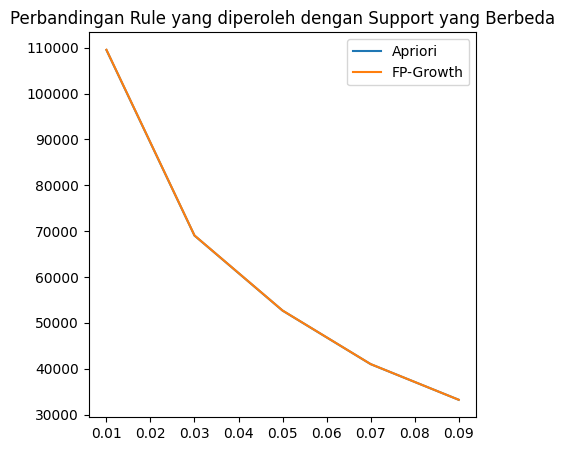

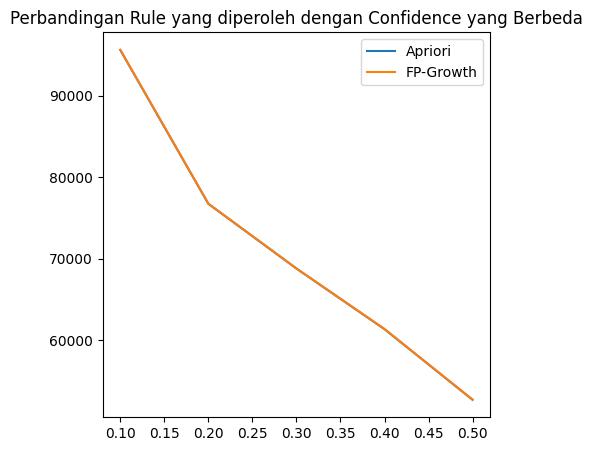

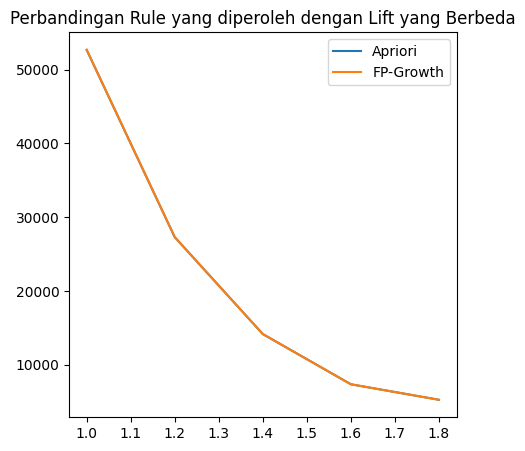

In [ ]:
# Visualisasi perbandingan rule yang diperoleh berdasarkan perbedaan support, confidence, dan lift
fig,ax = plt.subplots(figsize=(5, 5))
for key, grp in df_supp_cmp.groupby(['Method']):
    ax.plot(grp['supp'],grp['rule_count'],label=key)

ax.legend()
plt.title("Perbandingan Rule yang diperoleh dengan Support yang Berbeda")

fig,ax = plt.subplots(figsize=(5, 5))
for key, grp in df_conf_cmp.groupby(['Method']):
    ax.plot(grp['conf'],grp['rule_count'],label=key)

ax.legend()
plt.title("Perbandingan Rule yang diperoleh dengan Confidence yang Berbeda")

fig,ax = plt.subplots(figsize=(5, 5))
for key, grp in df_lift_cmp.groupby(['Method']):
    ax.plot(grp['lift'],grp['rule_count'],label=key)

ax.legend()
plt.title("Perbandingan Rule yang diperoleh dengan Lift yang Berbeda")
plt.show()

##### Penjelasan:
Tampilan diatas menunjukan perbandingan rule yang diperoleh ketika support, confidence dan lift memiliki nilai yang berbeda. Terlihat bahwa jumlah rule yang dihasilkan tidak berbeda jauh dan terlihat overlapping antara FP-Growth dan Apriori dimana perbedaannya tidak lebih dari 100

##### Export ke Excel (Untuk nantinya divisualisasikan di streamlit)

In [ ]:
writer = pd.ExcelWriter('asosiasi/visualization.xlsx')

ap_general.to_excel(writer, sheet_name='ap_general')
ap_pretest.to_excel(writer, sheet_name='ap_pretest')
ap_posttest.to_excel(writer, sheet_name='ap_posttest')
ap_delta.to_excel(writer, sheet_name='ap_delta')

rule_ap_general.to_excel(writer, sheet_name='rule_ap_general')
rule_ap_pretest.to_excel(writer, sheet_name='rule_ap_pretest')
rule_ap_posttest.to_excel(writer, sheet_name='rule_ap_posttest')
rule_ap_delta.to_excel(writer, sheet_name='rule_ap_delta')

fp_general.to_excel(writer, sheet_name='fp_general')
fp_pretest.to_excel(writer, sheet_name='fp_pretest')
fp_posttest.to_excel(writer, sheet_name='fp_posttest')
fp_delta.to_excel(writer, sheet_name='fp_delta')

rule_fp_general.to_excel(writer, sheet_name='rule_fp_general')
rule_fp_pretest.to_excel(writer, sheet_name='rule_fp_pretest')
rule_fp_posttest.to_excel(writer, sheet_name='rule_fp_posttest')
rule_fp_delta.to_excel(writer, sheet_name='rule_fp_delta')

ap_combination.to_excel(writer, sheet_name='ap_combination')
fp_combination.to_excel(writer, sheet_name='fp_combination')

ap_vis.to_excel(writer, sheet_name='ap_vis')
fp_vis.to_excel(writer, sheet_name='fp_vis')
df_cmp.to_excel(writer, sheet_name='df_cmp')

df_supp_cmp.to_excel(writer, sheet_name='df_supp_cmp')
df_conf_cmp.to_excel(writer, sheet_name='df_conf_cmp')
df_lift_cmp.to_excel(writer, sheet_name='df_lift_cmp')

writer.save()

In [ ]:
import platform
print("Sistem Operasi:",platform.platform())
print("Versi:",platform.version())
print("Arsitektur:",platform.machine())
print("Processor:",platform.processor())


Sistem Operasi: Linux-5.4.209-116.363.amzn2.x86_64-x86_64-with-glibc2.28
Versi: #1 SMP Wed Aug 10 21:19:18 UTC 2022
Arsitektur: x86_64
Processor: 


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1d50ba51-483e-487a-a800-81d0e24d7a16' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>